#  Credit EDA group case study

### Problem Statement:


- If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company

- If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company.

- The bank wants to understand the driving factors behind the loan default. i.e the variables which are strong in loan default or we can put it in a way that the segments that the bank wants to target to provide loans and make a profit in the process

## 1. Importing the required libraries

In [1]:
import warnings

warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
import plotly.express as px

In [4]:
#to view large outputs

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

## 2. Reading the data and checking for its structure

### 2.1 Reading the application data

- application_data.csv'  contains all the information of the client at the time of application.
- The data is about whether a client has payment difficulties.

In [5]:
# Reading the appication data file provided and storing it in a dataframe app

app=pd.read_csv("application_data.csv")

In [6]:
#Inspecting the data in the dataframe

app.head(10)

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  NAME_TYPE_SUITE      NAME_INCOME_TYPE            NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  EXT_SOURCE_1  EXT_SOURCE_2  EXT_SOURCE_3  APARTMENTS_AVG  BASEMENTAREA_AVG  YEARS_BEGINEXPLUATATION_AVG  YEARS_BUILD_AVG  COMMONAREA_AVG  ELEVATORS_AVG  ENTRANCES_AVG  FLOORSMAX_AVG  FLOORSMIN_AVG  LANDAREA_AVG  \
0      100002       1         Cash loans           M            N               Y             0          202500.0    406597.5      24700.5         351000.0    Unaccompanied               Working  Secondary / secondary special  Single / not married  House / apartment                    0.018801       -9461           -637            -3648.0            -2120          NaN           1               1                0                 1           1           0        Laborers              1.0                     2                            2                  WEDNESDAY                       10                           0                           0                            0                       0                       0                        0  Business Entity Type 3      0.083037      0.262949      0.139376          0.0247            0.0369                       0.9722           0.6192          0.0143           0.00         0.0690         0.0833         0.1250        0.0369   
1      100003       0         Cash loans           F            N               N             0          270000.0   1293502.5      35698.5        1129500.0           Family         State servant               Higher education               Married  House / apartment                    0.003541      -16765          -1188            -1186.0             -291          NaN           1               1                0                 1           1           0      Core staff              2.0                     1                            1                     MONDAY                       11                           0                           0                            0                       0                       0                        0                  School      0.311267      0.622246           NaN          0.0959            0.0529                       0.9851           0.7960          0.0605           0.08         0.0345         0.2917         0.3333        0.0130   
2      100004       0    Revolving loans           M            Y               Y             0           67500.0    135000.0       6750.0         135000.0    Unaccompanied               Working  Secondary / secondary special  Single / not married  House / apartment                    0.010032      -19046           -225            -4260.0            -2531         26.0           1               1                1                 1           1           0        Laborers              1.0                     2                            2                     MONDAY                        9                           0                           0                            0                       0                       0                        0              Government           NaN      0.555912      0.729567             NaN               NaN                          NaN              NaN             NaN            NaN            NaN            NaN            NaN           NaN   
3      100006       0         Cash loan

In [7]:
#Checking the number of rows and columns in the dataframe

app.shape

(307511, 122)

In [8]:
# Checking for percentage of missing values in every column


missed = pd.DataFrame()
missed['column'] = app.columns

missed['percent'] = [round(100* app[col].isnull().sum() / len(app), 2) for col in app.columns]
missed = missed[missed['percent']>0].sort_values('percent')

fig = px.bar(
    missed, 
    x='percent',
    y="column", 
    orientation='h', 
    title='Missed values percent for every column', 
    height=1700, 
    width=800
)

fig.show()

___Inferences:-___

- We can observe that there are very large number of columns in which the missing value are present.

- We need to decide on course of action on these columns 

In [9]:
# Checking the summary for the numeric columns 

app.describe()

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL    AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH    OWN_CAR_AGE     FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE     FLAG_PHONE     FLAG_EMAIL  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY   EXT_SOURCE_1  EXT_SOURCE_2   EXT_SOURCE_3  APARTMENTS_AVG  BASEMENTAREA_AVG  YEARS_BEGINEXPLUATATION_AVG  YEARS_BUILD_AVG  COMMONAREA_AVG  ELEVATORS_AVG  ENTRANCES_AVG  FLOORSMAX_AVG  FLOORSMIN_AVG   LANDAREA_AVG  LIVINGAPARTMENTS_AVG  LIVINGAREA_AVG  NONLIVINGAPARTMENTS_AVG  NONLIVINGAREA_AVG  APARTMENTS_MODE  BASEMENTAREA_MODE  YEARS_BEGINEXPLUATATION_MODE  YEARS_BUILD_MODE  COMMONAREA_MODE  ELEVATORS_MODE  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05  3.075110e+05  307499.000000     3.072330e+05               307511.000000  307511.000000  307511.000000      307511.000000    307511.000000  104582.000000  307511.000000   307511.000000    307511.000000     307511.000000  307511.000000  307511.000000    307509.000000         307511.000000                307511.000000            307511.000000               307511.000000               307511.000000                307511.000000           307511.000000           307511.000000            307511.000000  134133.000000  3.068510e+05  246546.000000    151450.00000     127568.000000                157504.000000    103023.000000    92646.000000  143620.000000  152683.000000  154491.000000   98869.000000  124921.000000          97312.000000   153161.000000             93997.000000      137829.000000    151450.000000      127568.000000                 157504.000000     103023.000000     92646.000000   143620.000000   
mean   278180.518577       0.080729       0.417052      1.687979e+05  5.990260e+05   27108.573909     5.383962e+05                    0.020868  -16036.995067   63815.045904       -4986.120328     -2994.202373      12.061091       0.999997        0.819889         0.199368          0.998133       0.281066       0.056720         2.152665              2.052463                     2.031521                12.063419                    0.015144                    0.050769                     0.040659                0.078173                0.230454                 0.179555       0.502130  5.143927e-01       0.510853         0.11744          0.088442                     0.977735         0.752471        0.044621       0.078942       0.149725       0.226282       0.231894       0.066333              0.100775        0.107399                 0.008809           0.028358         0.114231           0.087543                      0.977065          0.759637         0.042553        0.074490   
std    102790.175348       0.272419       0.722121      2.371231e+05  4.024908e+05   14493.737315     3.694465e+05                    0.013831    4363.988632  141275.766519        3522.886321      1509.450419      11.944812       0.001803        0.384280         0.399526          0.043164       0.449521       0.231307         0.910682              0.509034                     0.502737                 3.265832                    0.122126                    0.219526                     0.197499                0.268444                0.421124                 0.383817       0.211062  1.910602e-01       0.194844         0.10824          0.082438                     0.059223         0.113280        0.076036       0.134576       0.100049       0.144641       0.161380       0.081184              0.092576        0.110565                 0.047732           0.069523         0.107936           0.084307                      0.064575          0.110111         0.074445        0.132256   
min    100002.000000       0.000000       0.000000      2.

### 2.2 Reading the previous appication data

- previous_application.csv' contains information about the client’s previous loan data. 
- It contains the data whether the previous application had been Approved, Cancelled, Refused or Unused offer.

In [10]:
# Reading the  previous appication data file provided and storing it in a dataframe prev

prev=pd.read_csv("previous_application.csv")

In [11]:
# Inspecting the data in the dataframe
 
prev.head(10)

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  RATE_INTEREST_PRIVILEGED NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON  NAME_TYPE_SUITE NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE             CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  NFLAG_INSURED_ON_APPROVAL
0     2030495      271877     Consumer loans     1730.430          17145.0     17145.0               0.0          17145.0                   SATURDAY                       15                           Y                       1                0.0               0.182832                  0.867336                    XAP             Approved            -73  Cash through the bank                XAP              NaN         Repeater              Mobile            POS               XNA             Country-wide                35         Connectivity         12.0           middle  POS mobile with interest            365243.0           -42.0                      300.0          -42.0             -37.0                        0.0
1     2802425      108129         Cash loans    25188.615         607500.0    679671.0               NaN         607500.0                   THURSDAY                       11                           Y                       1                NaN                    NaN                       NaN                    XNA             Approved           -164                    XNA                XAP    Unaccompanied         Repeater                 XNA           Cash            x-sell           Contact center                -1                  XNA         36.0       low_action          Cash X-Sell: low            365243.0          -134.0                      916.0       365243.0          365243.0                        1.0
2     2523466      122040         Cash loans    15060.735         112500.0    136444.5               NaN         112500.0                    TUESDAY                       11                           Y                       1                NaN                    NaN                       NaN                    XNA             Approved           -301  Cash through the bank                XAP  Spouse, partner         Repeater                 XNA           Cash            x-sell  Credit and cash offices                -1                  XNA         12.0             high         Cash X-Sell: high            365243.0          -271.0                       59.0       365243.0          365243.0                        1.0
3     2819243      176158         Cash loans    47041.335         450000.0    470790.0               NaN         450000.0                     MONDAY                        7                           Y                       1                NaN                    NaN                       NaN                    XNA             Approved           -512  Cash through the bank                XAP              NaN         Repeater                 XNA           Cash            x-sell  Credit and cash offices                -1                  XNA         12.0           middle       Cash X-Sell: middle            365243.0          -482.0                     -152.0         -182.0            -177.0                        1.0
4     1784265      202054         Cash loans    31924.395         337500.0    404055.0               NaN         337500.0                   THURSDAY                        9                           Y                       1                NaN                    NaN                       NaN                Repairs              Refused           -781  Cash through the bank   

In [12]:
# Checking the number of rows and columns in the dataframe

prev.shape

(1670214, 37)

In [13]:
# Checking for percentage of missing values in every column

missed = pd.DataFrame()
missed['column'] = prev.columns

missed['percent'] = [round(100* prev[col].isnull().sum() / len(prev), 2) for col in prev.columns]
missed = missed[missed['percent']>0].sort_values('percent')

fig = px.bar(
    missed, 
    x='percent',
    y="column", 
    orientation='h', 
    title='Missed values percent for every column', 
    height=800, 
    width=800
)

fig.show()

___Infernces:-___


- We can see some of the columns have missing values as more than 25% of the total rows present

In [14]:
# Checking the column-wise info of the dataframe

prev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [15]:
# Checking the summary for the numeric columns 

prev.describe()

SK_ID_PREV    SK_ID_CURR   AMT_ANNUITY  AMT_APPLICATION    AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE  HOUR_APPR_PROCESS_START  NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  RATE_INTEREST_PRIVILEGED  DAYS_DECISION  SELLERPLACE_AREA   CNT_PAYMENT  DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  NFLAG_INSURED_ON_APPROVAL
count  1.670214e+06  1.670214e+06  1.297979e+06     1.670214e+06  1.670213e+06      7.743700e+05     1.284699e+06             1.670214e+06            1.670214e+06      774370.000000            5951.000000               5951.000000   1.670214e+06      1.670214e+06  1.297984e+06       997149.000000   997149.000000              997149.000000  997149.000000     997149.000000              997149.000000
mean   1.923089e+06  2.783572e+05  1.595512e+04     1.752339e+05  1.961140e+05      6.697402e+03     2.278473e+05             1.248418e+01            9.964675e-01           0.079637               0.188357                  0.773503  -8.806797e+02      3.139511e+02  1.605408e+01       342209.855039    13826.269337               33767.774054   76582.403064      81992.343838                   0.332570
std    5.325980e+05  1.028148e+05  1.478214e+04     2.927798e+05  3.185746e+05      2.092150e+04     3.153966e+05             3.334028e+00            5.932963e-02           0.107823               0.087671                  0.100879   7.790997e+02      7.127443e+03  1.456729e+01        88916.115834    72444.869708              106857.034789  149647.415123     153303.516729                   0.471134
min    1.000001e+06  1.000010e+05  0.000000e+00     0.000000e+00  0.000000e+00     -9.000000e-01     0.000000e+00             0.000000e+00            0.000000e+00          -0.000015               0.034781                  0.373150  -2.922000e+03     -1.000000e+00  0.000000e+00        -2922.000000    -2892.000000               -2801.000000   -2889.000000      -2874.000000                   0.000000
25%    1.461857e+06  1.893290e+05  6.321780e+03     1.872000e+04  2.416050e+04      0.000000e+00     5.084100e+04             1.000000e+01            1.000000e+00           0.000000               0.160716                  0.715645  -1.300000e+03     -1.000000e+00  6.000000e+00       365243.000000    -1628.000000               -1242.000000   -1314.000000      -1270.000000                   0.000000
50%    1.923110e+06  2.787145e+05  1.125000e+04     7.104600e+04  8.054100e+04      1.638000e+03     1.123200e+05             1.200000e+01            1.000000e+00           0.051605               0.189122                  0.835095  -5.810000e+02      3.000000e+00  1.200000e+01       365243.000000     -831.000000                -361.000000    -537.000000       -499.000000                   0.000000
75%    2.384280e+06  3.675140e+05  2.065842e+04     1.803600e+05  2.164185e+05      7.740000e+03     2.340000e+05             1.500000e+01            1.000000e+00           0.108909               0.193330                  0.852537  -2.800000e+02      8.200000e+01  2.400000e+01       365243.000000     -411.000000                 129.000000     -74.000000        -44.000000                   1.000000
max    2.845382e+06  4.562550e+05  4.180581e+05     6.905160e+06  6.905160e+06      3.060045e+06     6.905160e+06             2.300000e+01            1.000000e+00           1.000000               1.000000                  1.000000  -1.000000e+00      4.000000e+06  8.400000e+01       365243.000000   365243.000000              365243.000000  365243.000000     365243.000000                   1.000000

## 3. Data Quality Checks

### 3.1 Data Quality checks on  Previous Application data


- Removing columns with more than 50% of missing values from the prev dataframe


In [16]:
prev = prev.drop(['RATE_INTEREST_PRIMARY','RATE_INTEREST_PRIVILEGED','AMT_DOWN_PAYMENT','RATE_DOWN_PAYMENT'],axis =1)

#### Imputing the columns

- For the missing values of loan annuity(AMT_ANNUITY) and accompanying the clients (NAME_TYPE_SUITE) columns

In [17]:
values=prev['AMT_ANNUITY'].median()

prev.loc[prev['AMT_ANNUITY'].isnull(),'AMT_ANNUITY']=values

In [18]:
print(values)

11250.0


In [19]:
app['NAME_TYPE_SUITE'].fillna(app.NAME_TYPE_SUITE.mode()[0], inplace=True)

print('NAME_TYPE_SUITE: ',app['NAME_TYPE_SUITE'].mode()[0])

NAME_TYPE_SUITE:  Unaccompanied


### 3.2 Data Quality checks on  Application data

- Removing columns with more than 25% of missing values from the app dataframe

In [20]:
app = app.loc[:, app.isnull().mean() <= .25]

In [21]:
# checking the shape of the dataframe after removing the values
app.shape

(307511, 72)

In [22]:
# checking for  null values in reamining null values
app.isnull().sum()

SK_ID_CURR                         0
TARGET                             0
NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
CNT_CHILDREN                       0
AMT_INCOME_TOTAL                   0
AMT_CREDIT                         0
AMT_ANNUITY                       12
AMT_GOODS_PRICE                  278
NAME_TYPE_SUITE                    0
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
REGION_POPULATION_RELATIVE         0
DAYS_BIRTH                         0
DAYS_EMPLOYED                      0
DAYS_REGISTRATION                  0
DAYS_ID_PUBLISH                    0
FLAG_MOBIL                         0
FLAG_EMP_PHONE                     0
FLAG_WORK_PHONE                    0
FLAG_CONT_MOBILE                   0
FLAG_PHONE                         0
FLAG_EMAIL                         0
C

#### Imputing the values of columns 

- Missing values in variable NAME_TYPE_SUITE replaced with the MODE value

In [23]:
app['NAME_TYPE_SUITE'].fillna(app.NAME_TYPE_SUITE.mode()[0], inplace=True)

print('NAME_TYPE_SUITE: ',app['NAME_TYPE_SUITE'].mode()[0])


NAME_TYPE_SUITE:  Unaccompanied


- For categorical variable the value which should be imputed with maximum in frequency.

- So the value to be imputed are:

In [24]:
app["OBS_30_CNT_SOCIAL_CIRCLE"].fillna(app.OBS_30_CNT_SOCIAL_CIRCLE.mode()[0],inplace=True)

print('OBS_30_CNT_SOCIAL_CIRCLE: ',app['OBS_30_CNT_SOCIAL_CIRCLE'].mode()[0])

app["DEF_30_CNT_SOCIAL_CIRCLE"].fillna(app.DEF_30_CNT_SOCIAL_CIRCLE.mode()[0],inplace=True)

print('DEF_30_CNT_SOCIAL_CIRCLE :' ,app["DEF_30_CNT_SOCIAL_CIRCLE"].mode()[0])

app["OBS_60_CNT_SOCIAL_CIRCLE"].fillna(app.OBS_60_CNT_SOCIAL_CIRCLE.mode()[0],inplace=True)

print('OBS_60_CNT_SOCIAL_CIRCLE: ',app['OBS_60_CNT_SOCIAL_CIRCLE'].mode()[0])

app["DEF_60_CNT_SOCIAL_CIRCLE"].fillna(app.DEF_60_CNT_SOCIAL_CIRCLE.mode()[0],inplace=True)

print('DEF_60_CNT_SOCIAL_CIRCLE :' ,app["DEF_60_CNT_SOCIAL_CIRCLE"].mode()[0])


OBS_30_CNT_SOCIAL_CIRCLE:  0.0
DEF_30_CNT_SOCIAL_CIRCLE : 0.0
OBS_60_CNT_SOCIAL_CIRCLE:  0.0
DEF_60_CNT_SOCIAL_CIRCLE : 0.0


- Imputing Missing values in the following columns with 0. 
- We are assuming that missisng values means that there were no inquiries for the person.

In [25]:
app[['AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR']]= app[['AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK' ,'AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR']].fillna(value=0.0)

- Imputing the missing values with the median value

In [26]:
values=prev['AMT_ANNUITY'].median()

prev.loc[prev['AMT_ANNUITY'].isnull(),'AMT_ANNUITY']=values

- Checking the data types of columns 

In [27]:
app.select_dtypes('object').columns 


Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE'], dtype='object')

In [28]:
app.select_dtypes('float64').columns 


Index(['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_REGISTRATION', 'CNT_FAM_MEMBERS', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR'], dtype='object')

- The variabes such as (number of days,number of enquiries,number of family members and number of people in social circle) could not be float.So converting them to integer data type

In [29]:
app['DAYS_REGISTRATION'] = app['DAYS_REGISTRATION'].astype(int,errors='ignore')


app['CNT_FAM_MEMBERS'] = app['CNT_FAM_MEMBERS'].astype(int,errors='ignore')


app['OBS_30_CNT_SOCIAL_CIRCLE'] = app['OBS_30_CNT_SOCIAL_CIRCLE'].astype(int,errors='ignore')


app['DEF_30_CNT_SOCIAL_CIRCLE'] = app['DEF_30_CNT_SOCIAL_CIRCLE'].astype(int,errors='ignore')


app['DAYS_LAST_PHONE_CHANGE'] = app['DAYS_LAST_PHONE_CHANGE'].astype(int,errors='ignore')


app['AMT_REQ_CREDIT_BUREAU_HOUR'] = app['AMT_REQ_CREDIT_BUREAU_HOUR'].astype(int,errors='ignore')

In [30]:
app.select_dtypes('int64').columns 


Index(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21'], dtype='object')

___We notice that a lot of  columns of int data type have 2 unique values. These are flags or Flag type varibles. Which have no use in bivariate analysis. These can be converted to Yes/No values for categorical analysis.___

- Function to calculate metadata to impute some  of missing data each column


In [31]:
def metadata(data):
    total = data.isnull().sum()
    percent = (data.isnull().sum()/data.isnull().count()*100)
    unique = data.nunique()
    datatypes = data.dtypes
    return pd.concat([total, percent, unique, datatypes], axis=1, keys=['Total', 'Percent', 'Unique', 'Data_Type']).sort_values(by="Percent", ascending=False)

In [32]:
appmetadata=metadata(app)


- Columns to be converted for Categorical Analysis ( We have considered No as 0 and Yes as 1 ) 


In [33]:
# Columns to be converted for Categorical Analysis

colstoconvert=list(appmetadata[(appmetadata.Unique==2)&(appmetadata.Data_Type=="int64")].index)

def convert(app, cols_to_convert):
    for y in colstoconvert:
        app.loc[:,y].replace((0, 1), ('N', 'Y'), inplace=True)
    return app


convert(app, colstoconvert)

app.TARGET.replace(('N', 'Y'), (0, 1), inplace=True)

app.dtypes.value_counts()

object     43
float64    16
int64       9
int32       4
dtype: int64

- Filling missing values of AMT_ANNUNITY,EXT_SOURCE_2 , EXT_SOURCE_3 column  with median
 

In [34]:
values=app['AMT_ANNUITY'].median()

app.loc[app['AMT_ANNUITY'].isnull(),'AMT_ANNUITY']=values

In [35]:
app['EXT_SOURCE_2'].fillna(app.EXT_SOURCE_2.median(), inplace=True)

print(app['EXT_SOURCE_2'].median())

0.5659614260608526


In [36]:
app['EXT_SOURCE_3'].fillna(app.EXT_SOURCE_3.median(), inplace=True)

print(app['EXT_SOURCE_3'].median())

0.5352762504724826


In [37]:
app['AMT_GOODS_PRICE'].fillna(app.AMT_GOODS_PRICE.median(), inplace=True)

print(app['AMT_GOODS_PRICE'].median())

450000.0


- The columns such as Gender(CODE_GENDER) and type of organization(ORGANIZATION_TYPE) where the value is mentioned as 'XNA' which means 'Not Available'. 

- So we have to find the number of rows and columns and implement suitable techniques on them to fill those missing values or to delete them.

In [38]:
# For Gender column


app[app['CODE_GENDER']=='XNA'].shape

(4, 72)

In [39]:
# Describing the Gender column to check the number of females and males

app['CODE_GENDER'].value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

- Since, Female is having the majority and only 4 rows are having NA values, we can update those columns with Gender 'F' as there will be no impact on the dataset

In [40]:
app.loc[app['CODE_GENDER']=='XNA','CODE_GENDER']='F'
app['CODE_GENDER'].value_counts()

F    202452
M    105059
Name: CODE_GENDER, dtype: int64

In [41]:
# For Organization column

app[app['ORGANIZATION_TYPE']=='XNA'].shape

(55374, 72)

In [42]:
app['ORGANIZATION_TYPE'].describe()

count                     307511
unique                        58
top       Business Entity Type 3
freq                       67992
Name: ORGANIZATION_TYPE, dtype: object

- So, for column 'ORGANIZATION_TYPE', we have total count of 307511 rows of which 55374 rows are having 'XNA' values. Which means 18% of the column is having this values. 

- Hence if we drop the rows of total 55374, will not have any major impact on our dataset.

In [43]:
app=app.drop(app.loc[app['ORGANIZATION_TYPE']=='XNA'].index)
app[app['ORGANIZATION_TYPE']=='XNA'].shape

(0, 72)

In [44]:
app.isnull().sum()

SK_ID_CURR                     0
TARGET                         0
NAME_CONTRACT_TYPE             0
CODE_GENDER                    0
FLAG_OWN_CAR                   0
FLAG_OWN_REALTY                0
CNT_CHILDREN                   0
AMT_INCOME_TOTAL               0
AMT_CREDIT                     0
AMT_ANNUITY                    0
AMT_GOODS_PRICE                0
NAME_TYPE_SUITE                0
NAME_INCOME_TYPE               0
NAME_EDUCATION_TYPE            0
NAME_FAMILY_STATUS             0
NAME_HOUSING_TYPE              0
REGION_POPULATION_RELATIVE     0
DAYS_BIRTH                     0
DAYS_EMPLOYED                  0
DAYS_REGISTRATION              0
DAYS_ID_PUBLISH                0
FLAG_MOBIL                     0
FLAG_EMP_PHONE                 0
FLAG_WORK_PHONE                0
FLAG_CONT_MOBILE               0
FLAG_PHONE                     0
FLAG_EMAIL                     0
CNT_FAM_MEMBERS                2
REGION_RATING_CLIENT           0
REGION_RATING_CLIENT_W_CITY    0
WEEKDAY_AP

- We can observe that most ( barring 3 rows ) of the rows dont have null values present in them 

#### Checking for outliers

-  Converting '-ve' values into '+ve' Values


In [45]:
app['DAYS_BIRTH'] = app['DAYS_BIRTH'].abs()

app['DAYS_EMPLOYED'] = app['DAYS_EMPLOYED'].abs()

app['DAYS_REGISTRATION'] = app['DAYS_REGISTRATION'].abs()

app['DAYS_ID_PUBLISH'] = app['DAYS_ID_PUBLISH'].abs()

app['DAYS_LAST_PHONE_CHANGE'] = app['DAYS_LAST_PHONE_CHANGE'].abs()

- Box plot for selected columns to check for outliers 


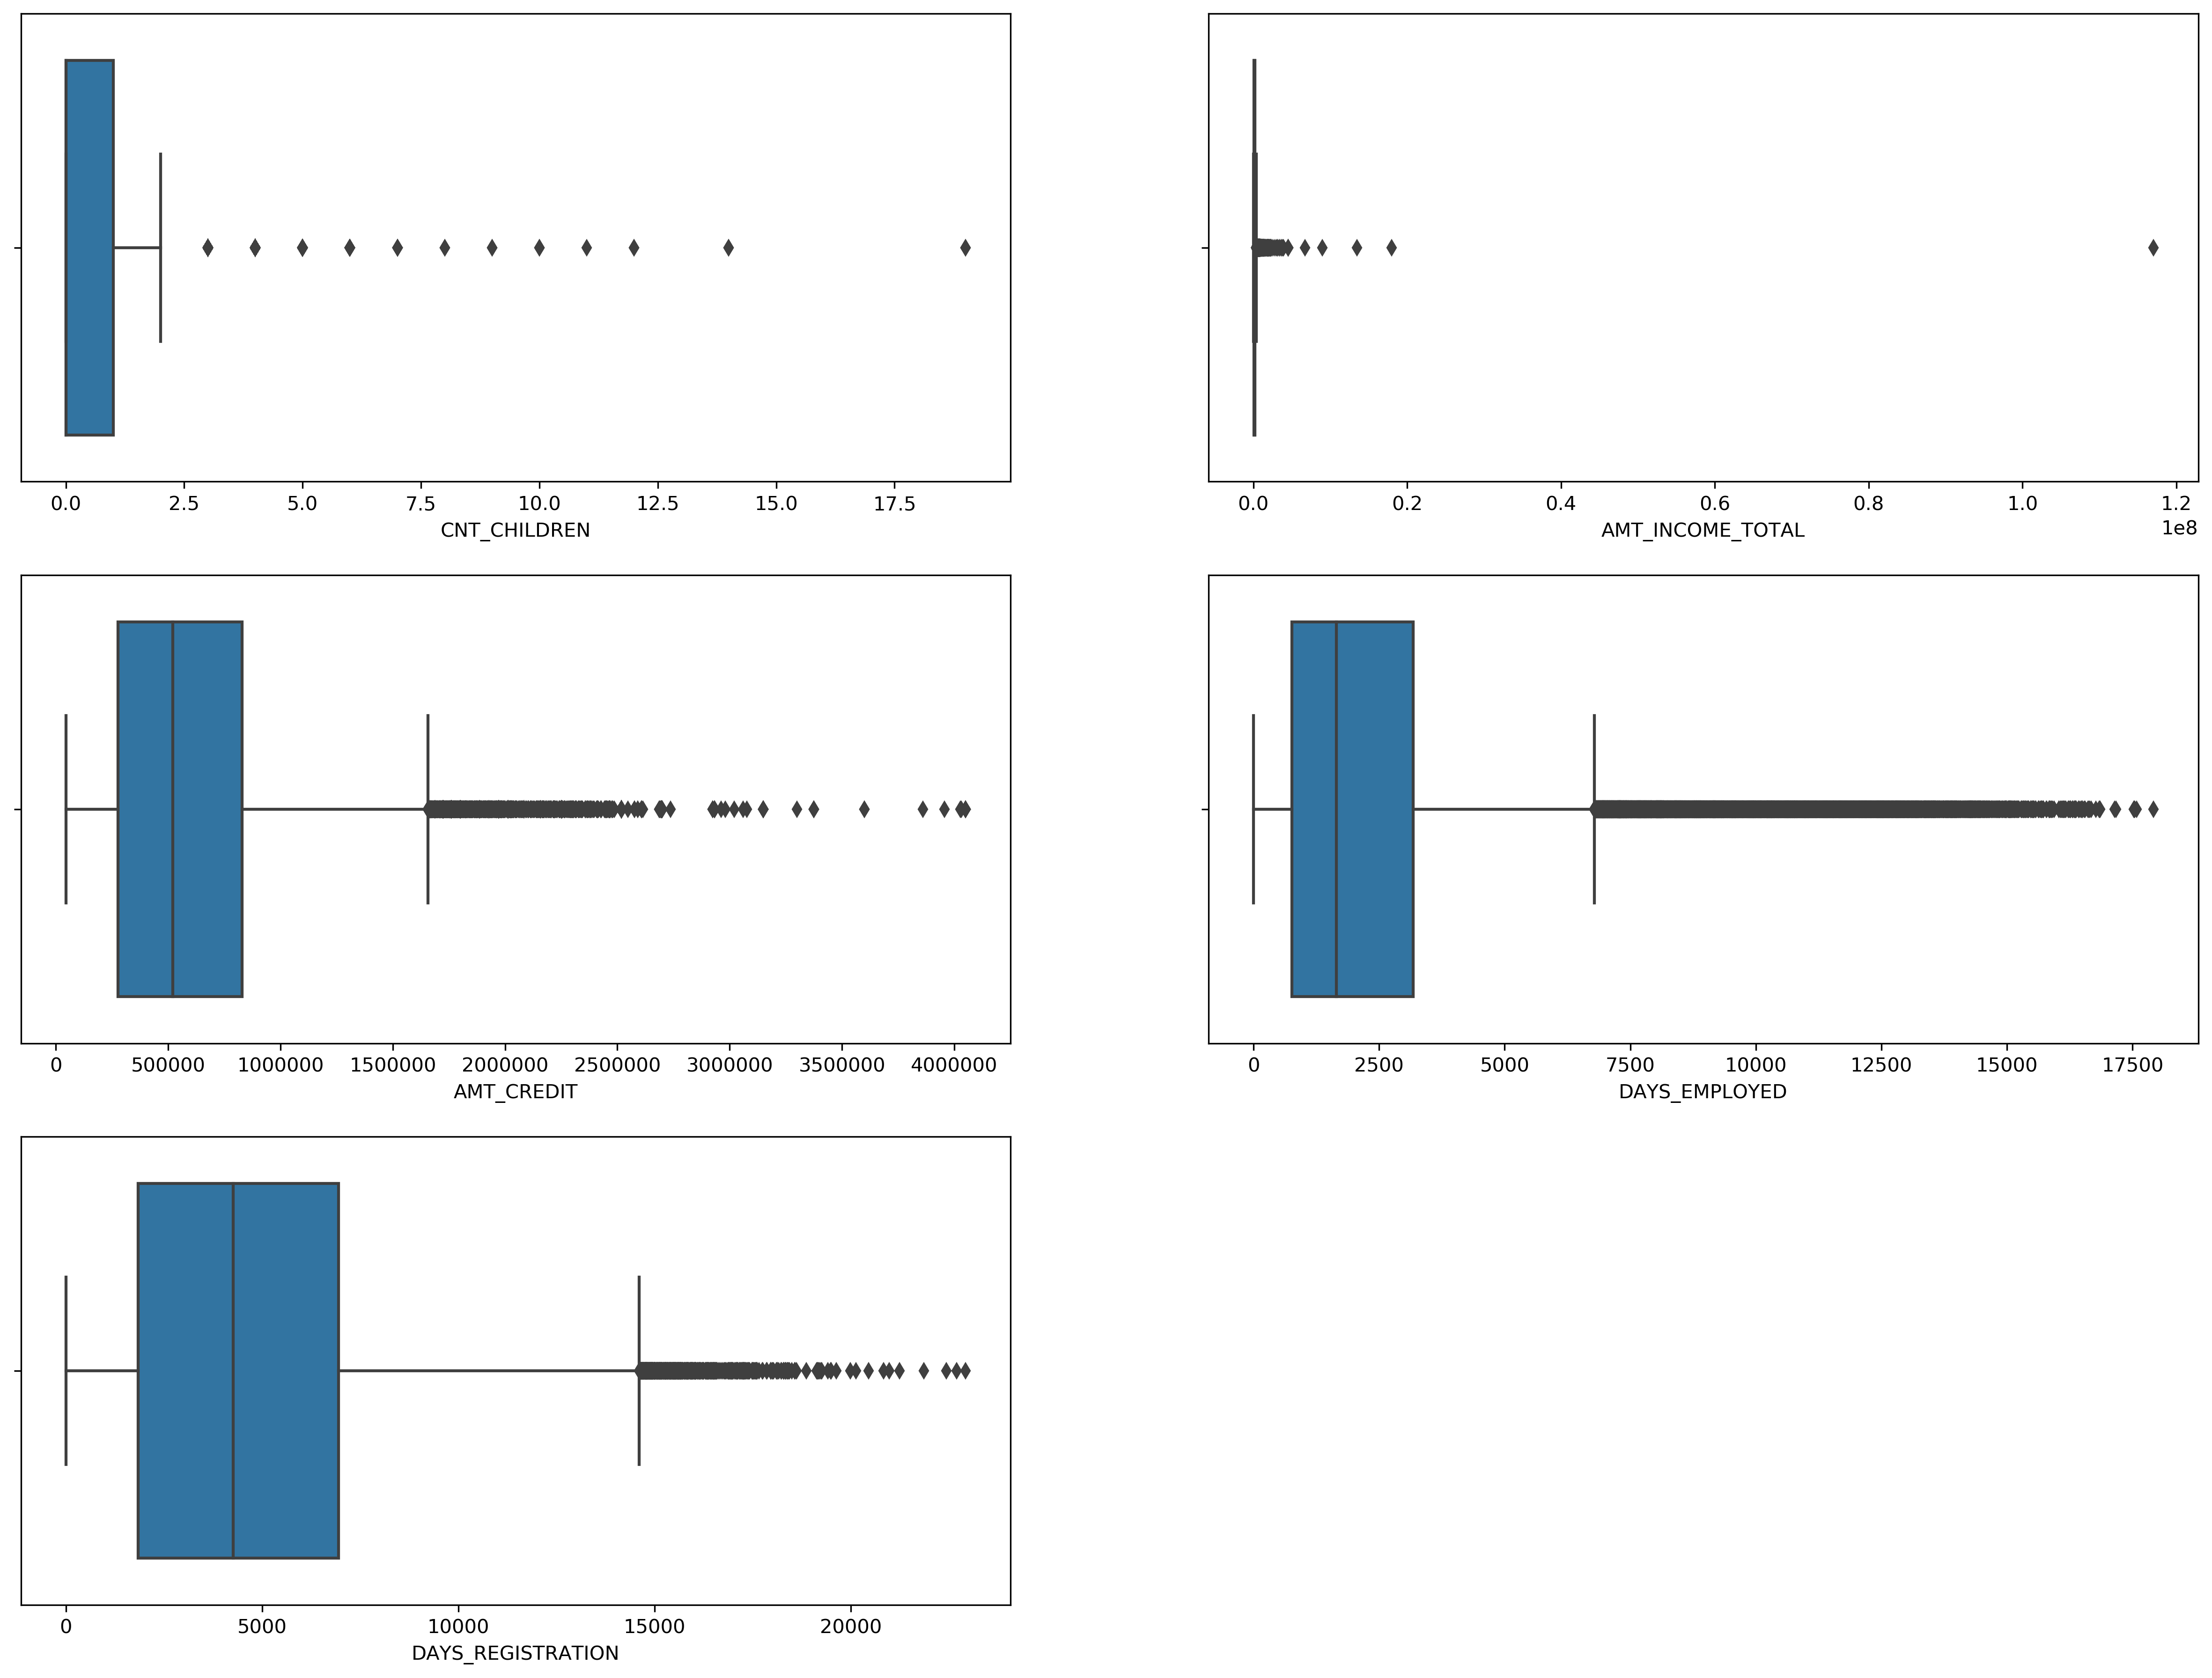

In [46]:
features = ['CNT_CHILDREN', 'AMT_INCOME_TOTAL','AMT_CREDIT','DAYS_EMPLOYED', 'DAYS_REGISTRATION']

plt.figure(figsize = (20, 15), dpi=300)

for i in enumerate(features):
    plt.subplot(3, 2, i[0]+1)
    sns.boxplot(x = i[1], data = app)

plt.show()

___Outliers Inferences : -___

- In the first quartile of CNT_CHILDREN has most of the data are prsent

- There is single high value data point as outlier present in AMT_INCOME_TOTAL and removal of this point will drasticaly impact our for further analysis.

- The first quartiles is slim compare to third quartile for AMT_CREDIT,AMT_ANNUITY, DAYS_EMPLOYED, DAYS_REGISTRATION. This mean data is skewed towards first quartile.


Note:- (We have just pointed the outliers and no further action has been taken on them )

#### Bin Creation

- Creating bins for amount income range and credit range columns for better analysis


In [47]:
bins = [0,100000,200000,300000,400000,500000,10000000000]
slot = ['<100000', '100000-200000','200000-300000','300000-400000','400000-500000', '500000 and above']
app['AMT_INCOME_RANGE']=pd.cut(app['AMT_INCOME_TOTAL'],bins,labels=slot)


bins = [0,100000,200000,300000,400000,500000,600000,700000,800000,900000,10000000000]
slot = ['<100000', '100000-200000','200000-300000','300000-400000','400000-500000', '500000-600000',
        '600000-700000','700000-800000','850000-900000','900000 and above']
app['AMT_CREDIT_RANGE']=pd.cut(app['AMT_CREDIT'],bins,labels=slot)

### Merging the Dataframes

- Merging the two dataframes app and prev into a new dataframe called as app_prev dataframe

(This dataframe is used further in analysis) 

In [48]:
app_prev = app.merge(prev, left_on='SK_ID_CURR', right_on='SK_ID_CURR', how='inner')

In [49]:
#checking for number of rows and columns in a dataframe

app_prev.shape

(1140118, 106)

In [50]:
# checking for column-wise info

app_prev.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1140118 entries, 0 to 1140117
Columns: 106 entries, SK_ID_CURR to NFLAG_INSURED_ON_APPROVAL
dtypes: category(2), float64(27), int32(4), int64(14), object(59)
memory usage: 898.1+ MB


In [51]:
# checking for summary of numeric columns

app_prev.describe()

SK_ID_CURR        TARGET  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT_x  AMT_ANNUITY_x  AMT_GOODS_PRICE_x  REGION_POPULATION_RELATIVE    DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START_x  EXT_SOURCE_2  EXT_SOURCE_3  OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR    SK_ID_PREV  AMT_ANNUITY_y  AMT_APPLICATION  AMT_CREDIT_y  AMT_GOODS_PRICE_y  HOUR_APPR_PROCESS_START_y  NFLAG_LAST_APPL_IN_DAY  DAYS_DECISION  SELLERPLACE_AREA    CNT_PAYMENT  DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  NFLAG_INSURED_ON_APPROVAL
count  1.140118e+06  1.140118e+06  1.140118e+06      1.140118e+06  1.140118e+06   1.140118e+06       1.140118e+06                1.140118e+06  1.140118e+06   1.140118e+06       1.140118e+06     1.140118e+06     1.140118e+06          1.140118e+06                 1.140118e+06               1.140118e+06  1.140118e+06  1.140118e+06              1.140118e+06              1.140118e+06              1.140118e+06              1.140118e+06            1.140118e+06                1.140118e+06               1.140118e+06                1.140118e+06               1.140118e+06               1.140118e+06                1.140118e+06  1.140118e+06   1.140118e+06     1.140118e+06  1.140118e+06       8.876520e+05               1.140118e+06            1.140118e+06   1.140118e+06      1.140118e+06  896399.000000       688579.000000   688579.000000              688579.000000  688579.000000     688579.000000              688579.000000
mean   2.784378e+05  9.326666e-02  4.923754e-01      1.798601e+05  5.988711e+05   2.776061e+04       5.375959e+05                2.074396e-02  1.498252e+04   2.456019e+03       4.638679e+03     2.828750e+03     2.260768e+00          2.053276e+00                 2.030749e+00               1.212403e+01  5.129017e-01  4.878416e-01              1.538143e+00              1.501704e-01              1.520130e+00              1.052128e-01            1.089511e+03                5.659063e-03               6.143224e-03                3.417190e-02               2.821489e-01               3.111713e-01                2.486571e+00  1.922484e+06   1.488368e+04     1.737888e+05  1.956659e+05       2.232550e+05               1.265568e+01            9.963442e-01  -8.858701e+02      3.237863e+02      15.533526       340579.773942    14110.343664               35436.304006   75336.621914      81308.162742                   0.309661
std    1.028304e+05  2.908059e-01  7.629301e-01      2.174405e+05  3.857198e+05   1.402035e+04       3.538889e+05                1.332284e-02  3.634048e+03   2.314548e+03       3.274842e+03     1.516788e+03     9.328707e-01          4.992291e-01                 4.925183e-01               3.272107e+00  1.899391e-01  1.812357e-01              2.525256e+00              4.595080e-01              2.503086e+00              3.728670e-01            8.019666e+02                7.836470e-02               1.038458e-01                1.998376e-01               9.557681e-01               9.087038e-01                2.204722e+00  5.326710e+05   1.343060e+04     2.967152e+05  3.229700e+05       3.194728e+05               3.359873e+00            6.035230e-02   7.834204e+02      6.682626e+03      14.328991        91789.161357    73096.760838              109156.107502  148757.806397     152851.085235                   0.462354
min    1.000020e+05  0.000000e+00  0.000000e+00      2.565000e+04  4.500000e+04   1.980000e+03       4.050000e+04                2.900000e-04  7.489000e+03   0.000000e+00       0.000000e+00     0.000000e+00     1.000000e+00          1.000000e+00                 1.000000e+00               0.000000e+00  8.173617e-

In [52]:
app_prev.head(10)

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE_x CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT_x  AMT_ANNUITY_x  AMT_GOODS_PRICE_x NAME_TYPE_SUITE_x NAME_INCOME_TYPE            NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH FLAG_MOBIL FLAG_EMP_PHONE FLAG_WORK_PHONE FLAG_CONT_MOBILE FLAG_PHONE FLAG_EMAIL  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START_x  HOUR_APPR_PROCESS_START_x REG_REGION_NOT_LIVE_REGION REG_REGION_NOT_WORK_REGION LIVE_REGION_NOT_WORK_REGION REG_CITY_NOT_LIVE_CITY REG_CITY_NOT_WORK_CITY LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  EXT_SOURCE_2  EXT_SOURCE_3  OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE FLAG_DOCUMENT_2 FLAG_DOCUMENT_3 FLAG_DOCUMENT_4 FLAG_DOCUMENT_5 FLAG_DOCUMENT_6 FLAG_DOCUMENT_7  \
0      100002       1           Cash loans           M            N               Y             0          202500.0      406597.5        24700.5           351000.0     Unaccompanied          Working  Secondary / secondary special  Single / not married  House / apartment                    0.018801        9461            637               3648             2120          Y              Y               N                Y          Y          N              1.0                     2                            2                    WEDNESDAY                         10                          N                          N                           N                      N                      N                       N  Business Entity Type 3      0.262949      0.139376                         2                         2                       2.0                       2.0                  1134.0               N               Y               N               N               N               N   
1      100003       0           Cash loans           F            N               N             0          270000.0     1293502.5        35698.5          1129500.0            Family    State servant               Higher education               Married  House / apartment                    0.003541       16765           1188               1186              291          Y              Y               N                Y          Y          N              2.0                     1                            1                       MONDAY                         11                          N                          N                           N                      N                      N                       N                  School      0.622246      0.535276                         1                         0                       1.0                       0.0                   828.0               N               Y               N               N               N               N   
2      100003       0           Cash loans           F            N               N             0          270000.0     1293502.5        35698.5          1129500.0            Family    State servant               Higher education               Married  House / apartment                    0.003541       16765           1188               1186              291          Y              Y               N                Y          Y          N              2.0                     1                            1                       MONDAY                         11                          N                          N                           N                      N                      N                       N                  School      0.622246      0.535276                         1                         0                       1.0                       0.0                   828.0               N               Y               N               N               N               N   
3      1000

## 4. Data Analysis

### 4.1 Data Analysis on Application Data

- Checking for distribution of defaluters and non defaulters

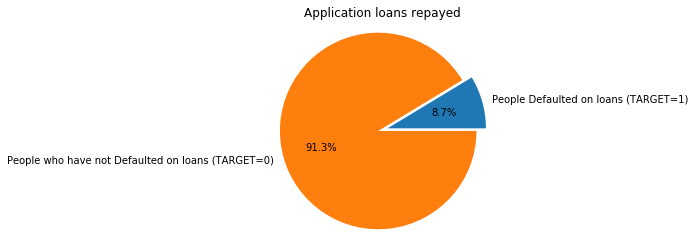

In [53]:
count1 = 0 
count2= 0
for i in app['TARGET'].values:
    if i == 1:
        count1 += 1
    else:
        count2+= 1
        
count1 = (count1/len(app['TARGET']))*100
count2 =(count2/len(app['TARGET']))*100

x = ['People Defaulted on loans (TARGET=1)','People who have not Defaulted on loans (TARGET=0)']
y = [count1, count2]

explode = (0.1, 0) 

fig1, ax1 = plt.subplots()
ax1.pie(y, explode=explode, labels=x, autopct='%1.1f%%')
       
ax1.axis('equal') 


plt.title('Application loans repayed')

plt.show()

- ___Inference___ : - The percentage of people who have not defaulted on loans is considerably more than percentage of people who have defaulted on loans 



In [54]:
app_0 =app[app.TARGET==0]
app_1=app[app.TARGET==1]

-  Calculating Imbalance percentage

In [55]:
round(len(app_0)/len(app_1),2)

10.55

- The Imbalance ratio is 10.55


- Function to do univariate analysis

In [56]:
def plot(var):
    plt.figure(figsize=(18,5))
    plt.subplot(1, 2, 1)
    sns.countplot(var, data=app_0)
    plt.title('Distribution of '+ '%s' %var +' for Non-Defaulters', fontsize=14)
    plt.xlabel(var)
    plt.xticks(rotation=90)
    plt.ylabel('Number of cases for non-defaulters')
    plt.subplot(1, 2, 2)
    sns.countplot(var, data=app_1)
    plt.title('Distribution of '+ '%s' %var +' for Defaulters', fontsize=14)
    plt.xlabel(var)
    plt.xticks(rotation=90)
    plt.ylabel('Number of cases for defaulters')
    plt.show()

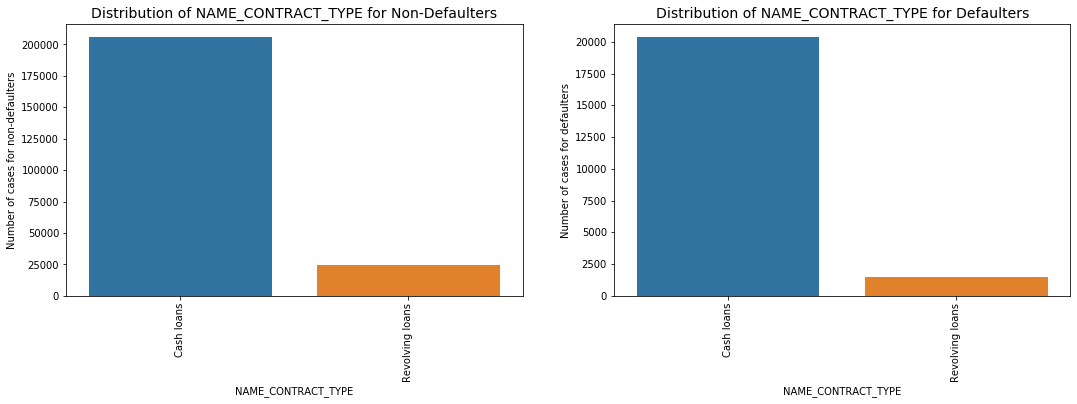

In [57]:
plot('NAME_CONTRACT_TYPE')


___Inferences :-___

- We can infer that the customers have opted considerably  more for cash loans rather the revolving loans (Revolving loans is also called as  open-end credit because the length of the loan isn't fixed and is flexible in nature).

- The Revolving loans have less percent of Defaulters when compared to Cash Loans .

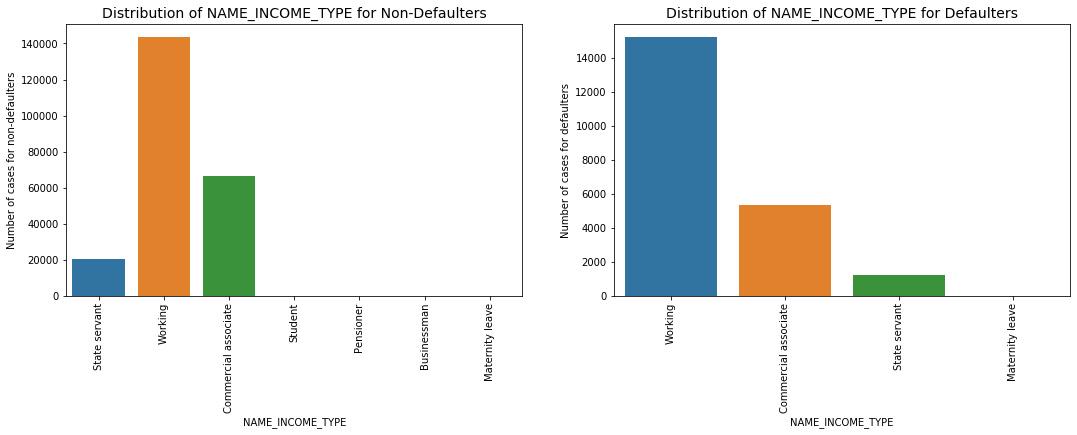

In [58]:
plot('NAME_INCOME_TYPE')

___Inferences:-___ 


- By comparing the above graphs we can infer the state servant ( Government employees ) have repaid their loans on time and have not defaulted on their loans comparatively. This could be because of the fact that Government employees have a stable income and risk free career. 

- Working class people have taken the most of the loans and have defaulted the most on loans and hence the banks must not focus much  on them.

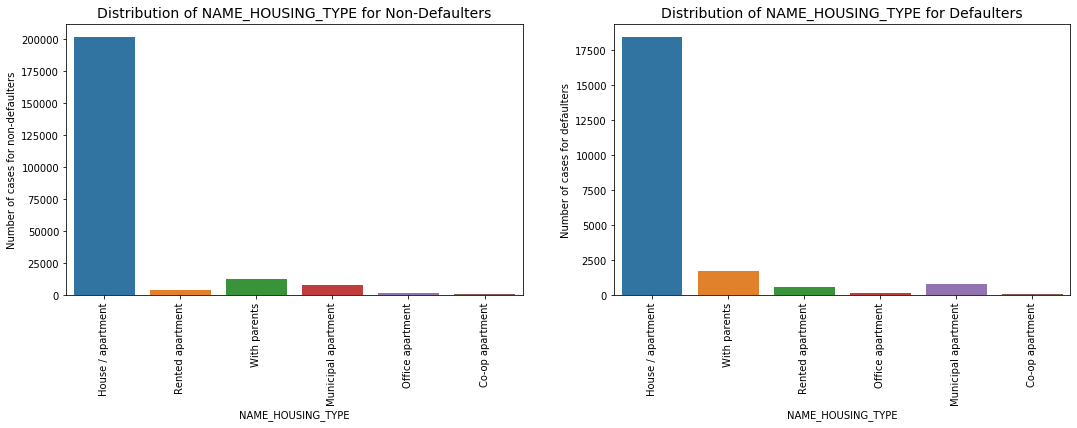

In [59]:
plot('NAME_HOUSING_TYPE')


___Inferences:-___

- By comapring the above graphs we can infer that the people who own house/apartment have taken the most loans.This could be due to the fact that the they can provide security required for the loans. 



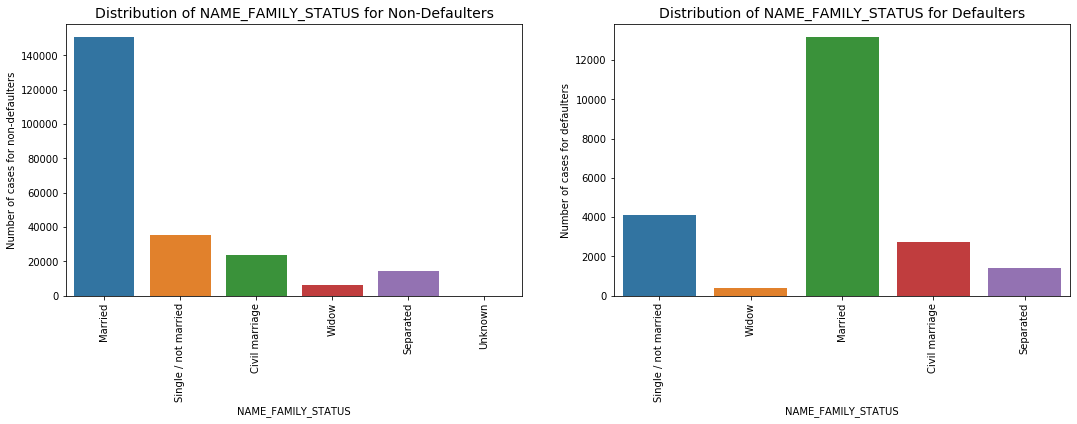

In [60]:
plot('NAME_FAMILY_STATUS')


___Inferences:-___ 


- From the above graph we can infer that the Single/not Married people have defaulted the most on the loans comparitively.

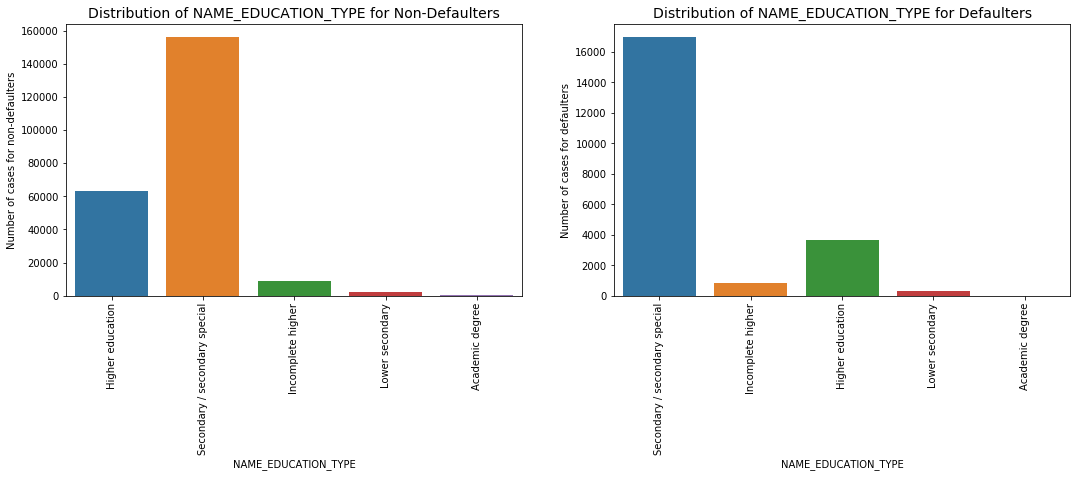

In [61]:
plot('NAME_EDUCATION_TYPE')


___Inferences:-___

- We can infer that People who have completed their higher education have not defaulted on their repayment of loans comparitively and hence banks can focus on this segment.

- Univariate Analysis of Variaables [After Binning of these variables] 

In [62]:
def uniplot(df,col,title,hue =None):
    
    sns.set_style('whitegrid')
    sns.set_context('talk')
    plt.rcParams["axes.labelsize"] = 20
    plt.rcParams['axes.titlesize'] = 22
    plt.rcParams['axes.titlepad'] = 30
    
    
    temp = pd.Series(data = hue)
    fig, ax = plt.subplots()
    width = len(df[col].unique()) + 7 + 4*len(temp.unique())
    fig.set_size_inches(width , 8)
    plt.xticks(rotation=45)
    plt.yscale('log')
    plt.title(title)
    ax = sns.countplot(data = df, x= col, order=df[col].value_counts().index,hue = hue,palette='magma') 
        
    plt.show()

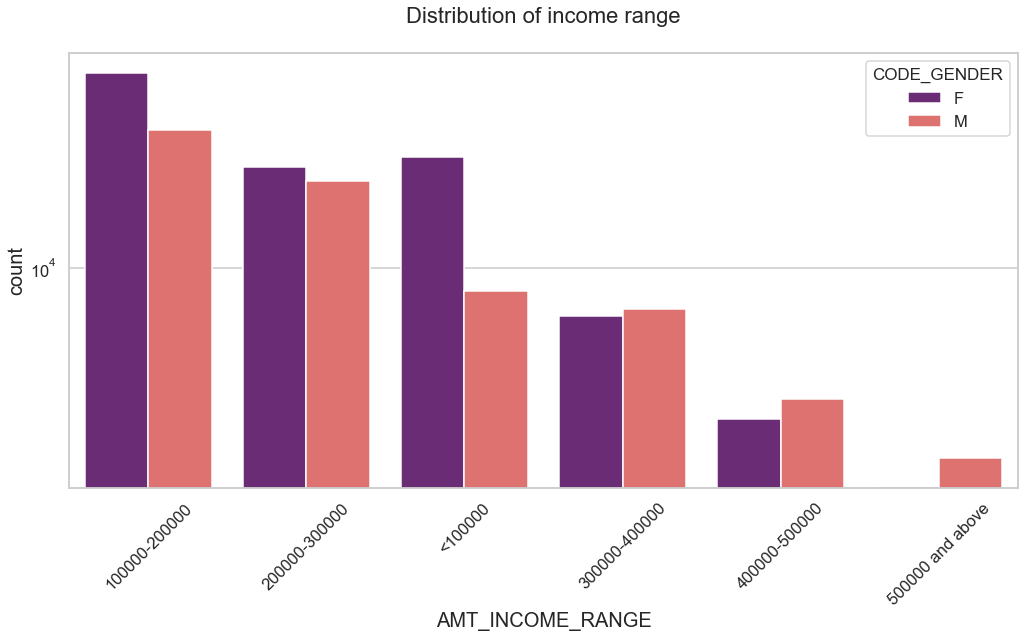

In [63]:
uniplot(app_0,col='AMT_INCOME_RANGE',title='Distribution of income range',hue='CODE_GENDER')

___Inferences:-___


- We can observe towards the higher income range the number females are more compared to males.


- Towards the lower income range we can observe that the number of females are less compared to males

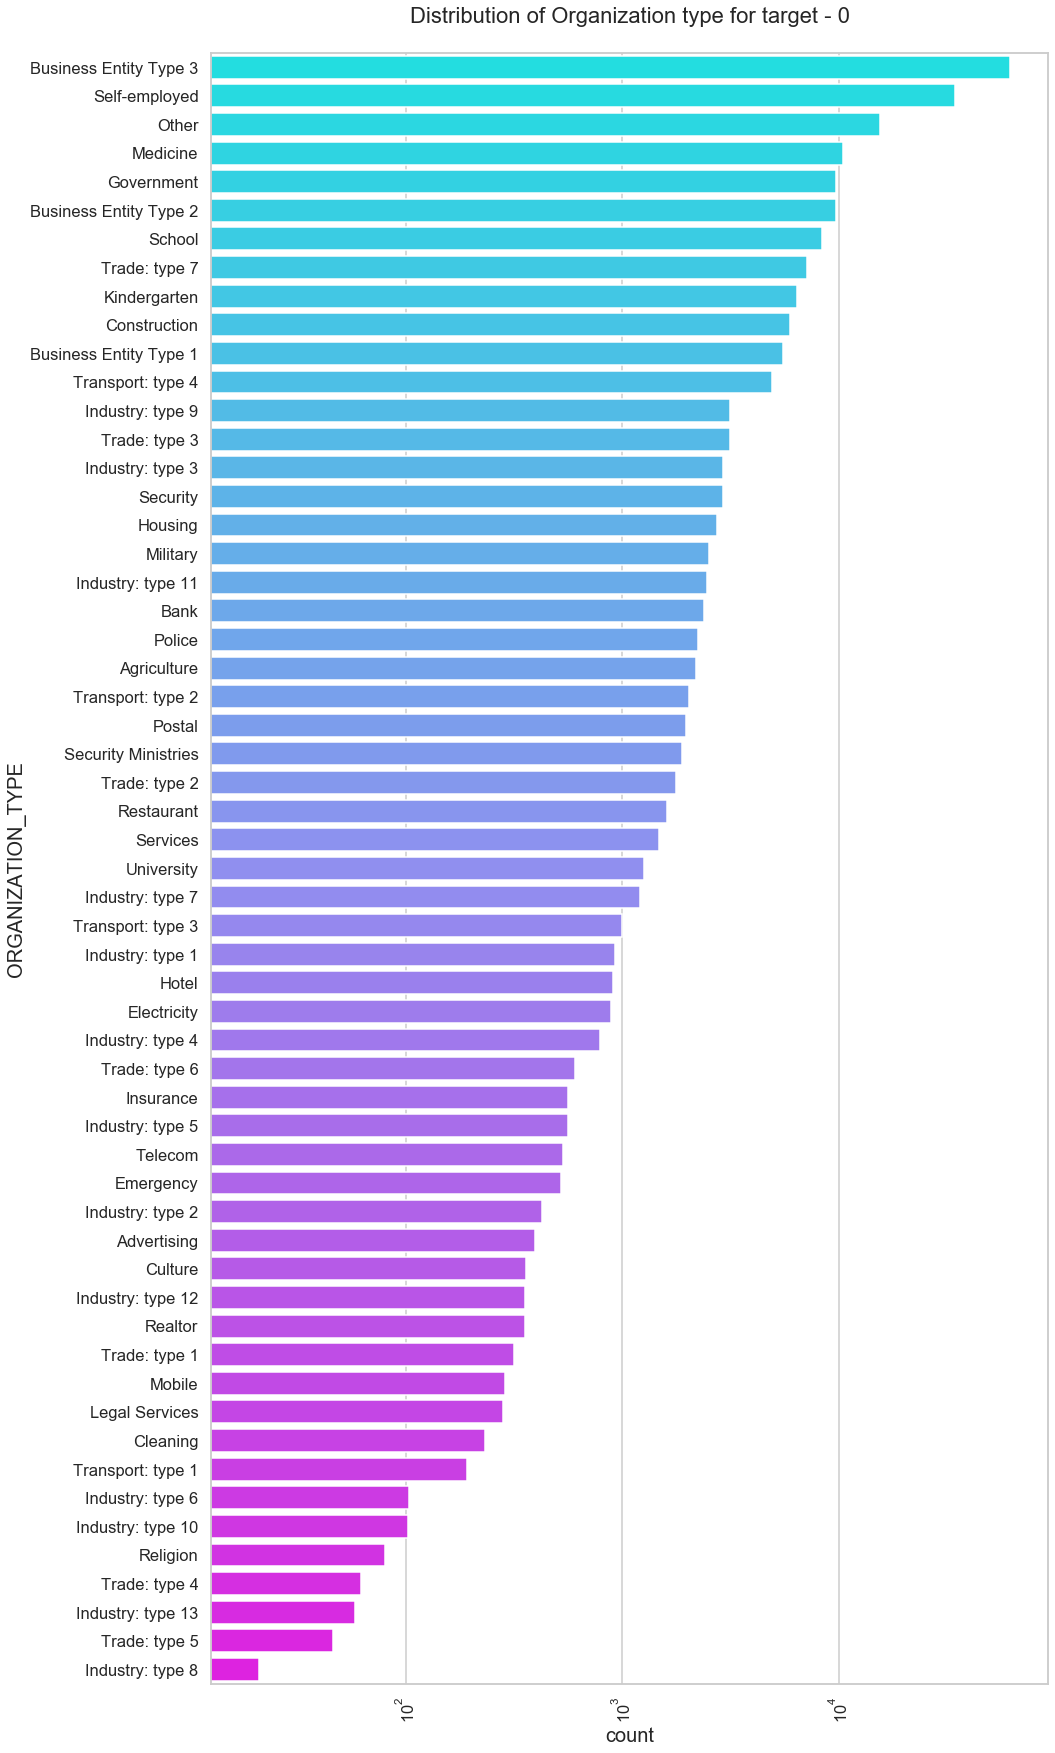

In [64]:
sns.set_style('whitegrid')
sns.set_context('talk')
plt.figure(figsize=(15,30))
plt.rcParams["axes.labelsize"] = 20
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.titlepad'] = 30

plt.title("Distribution of Organization type for target - 0")

plt.xticks(rotation=90)
plt.xscale('log')

sns.countplot(data=app_0,y='ORGANIZATION_TYPE',order=app_0['ORGANIZATION_TYPE'].value_counts().index,palette='cool')

plt.show()

___Inferences :-___

- Clients which have applied for credits are from most of the organization type Business entity Type 3 , Self employed , Other , Medicine and Government.


- Less clients are from Industry type 8,type 6, type 10, religion and trade type 5, type 4.

- Box plotting for ___univariate variables analysis___ in logarithmic scale


In [65]:
def univariate(data,col,title):
    sns.set_style('whitegrid')
    sns.set_context('talk')
    plt.rcParams["axes.labelsize"] = 20
    plt.rcParams['axes.titlesize'] = 22
    plt.rcParams['axes.titlepad'] = 30
    
    plt.title(title)
    plt.yscale('log')
    sns.boxplot(data =app_0, x=col,orient='v')
    plt.show()
    

- Distribution of income amount


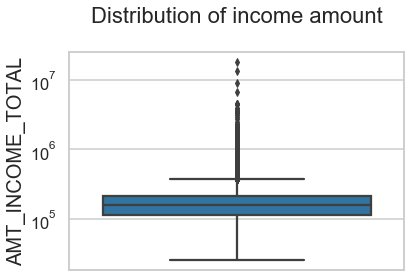

In [66]:
univariate(data=app_0,col='AMT_INCOME_TOTAL',title='Distribution of income amount')

___Inferences:-___ 



- The third quartiles is very slim for income amount.

- Distribution of credit amount


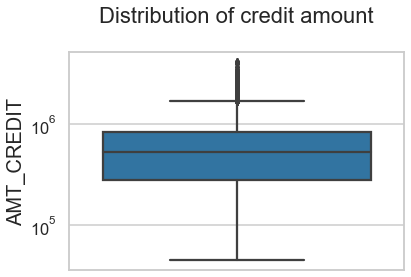

In [67]:
univariate(data=app_0,col='AMT_CREDIT',title='Distribution of credit amount')

___Infernces:-___


- The first quartile is bigger than third quartile for credit amount which means most of the credits of clients are present in the first quartile.

___Bivariate analysis___

- For Target 0 [ Non Defaulters (People who have repaid loan on time ) ] 

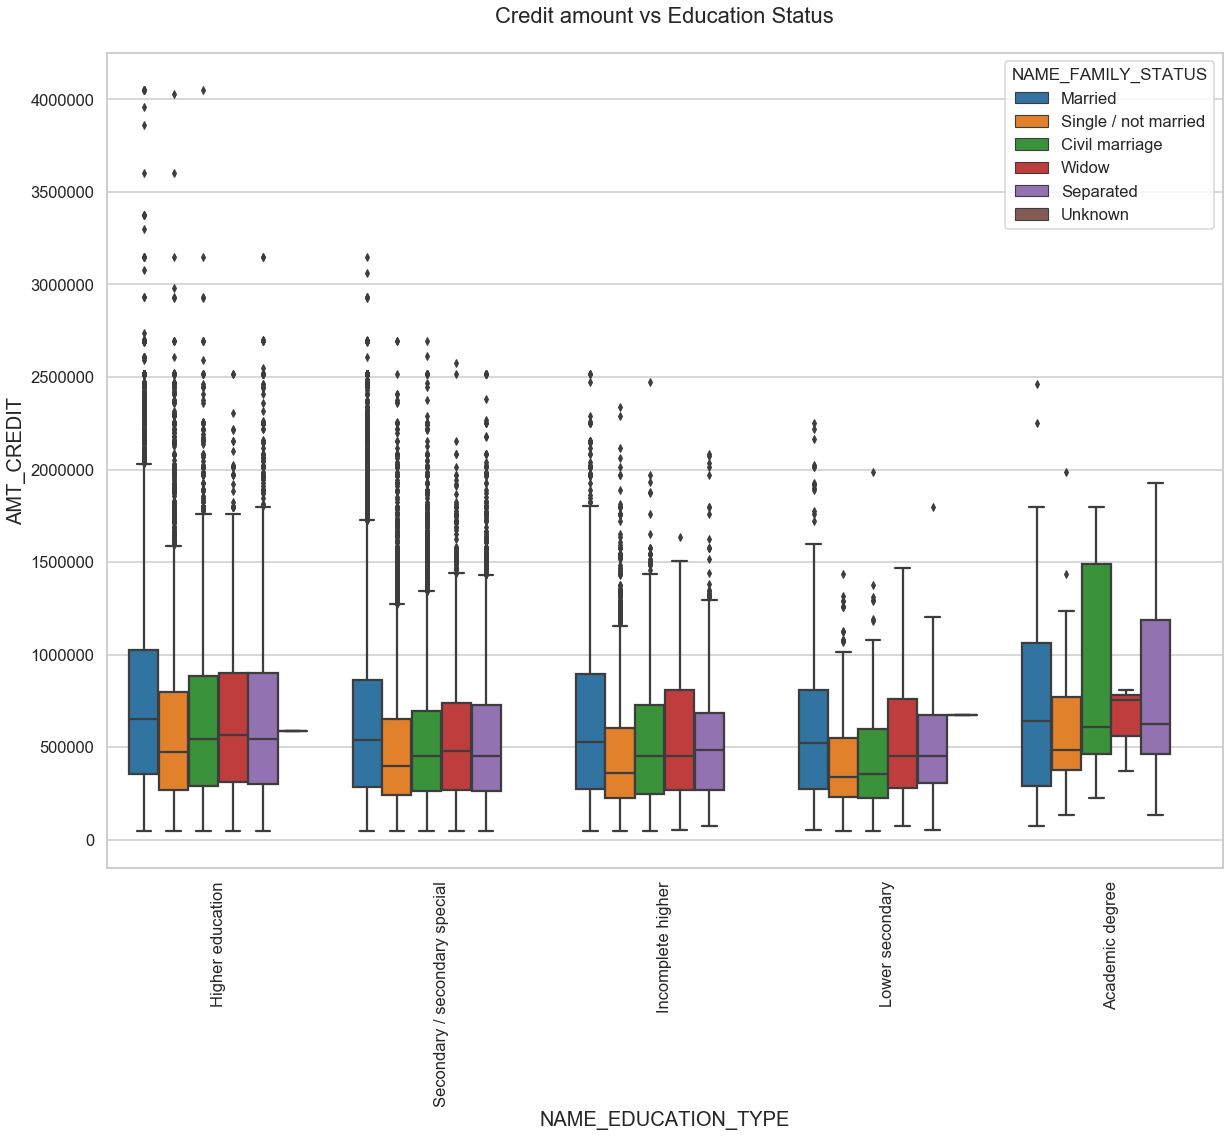

In [68]:
plt.figure(figsize=(20,15))
plt.xticks(rotation=90)
sns.boxplot(data =app_0, x='NAME_EDUCATION_TYPE',y='AMT_CREDIT',hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('Credit amount vs Education Status')
plt.show()

___Inferences :-___


- Observing the above box plot we can infer that the  Family status with civil marriage, marriage and separated of Academic degree education are having higher number of credits than others.

- Higher education with family status of marriage, single and civil marriage are having more outliers. 


- Civil marriage with Academic degree is having most of the credits in the third quartile.

- Target 1 [Defaulters (People who have not  repaid the  loan on time ) ]

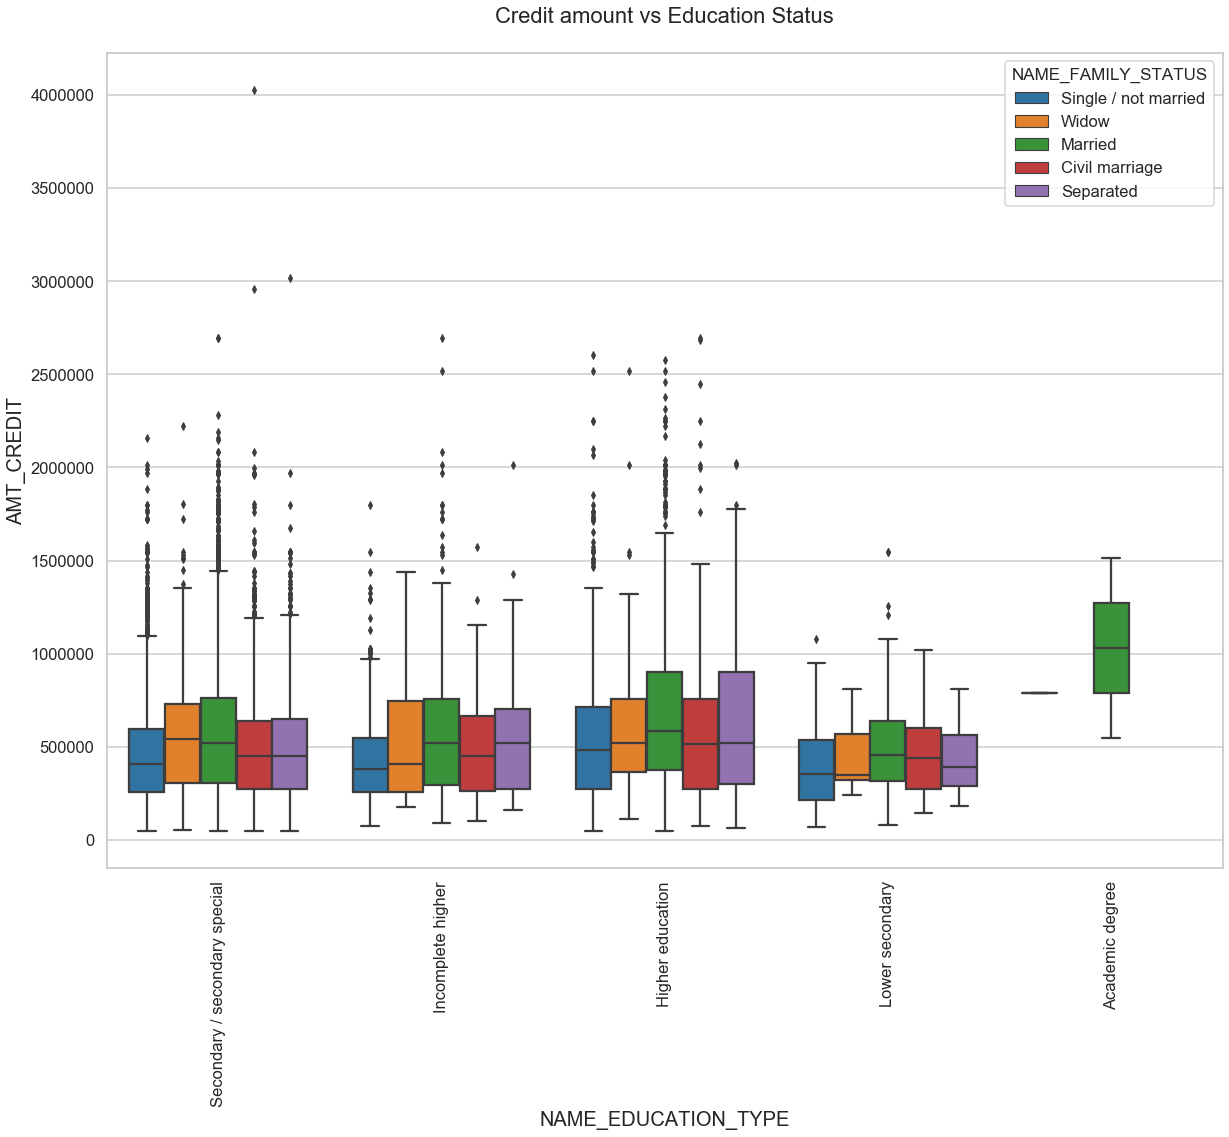

In [69]:
plt.figure(figsize=(20,15))
plt.xticks(rotation=90)
sns.boxplot(data =app_1, x='NAME_EDUCATION_TYPE',y='AMT_CREDIT',hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('Credit amount vs Education Status')
plt.show()

___Inferences :-___


- By observing the box plot we can say that Family status with civil marriage, marriage and separated of Academic degree education are having least number of defaulters than others.Hence banks can target this segment of people 

- Most of the outliers are from Education type of Higher education and Secondary.


### 4.2 Coorelation Analysis

- Heatmap for merged dataframes Columns for finding correlation between them 

In [70]:
corr = ( app_prev[['NAME_CONTRACT_TYPE_x','NAME_CASH_LOAN_PURPOSE','NAME_CONTRACT_STATUS','NAME_PAYMENT_TYPE','NAME_CLIENT_TYPE','CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY','CNT_CHILDREN','AMT_INCOME_TOTAL','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','DAYS_EMPLOYED']].corr())

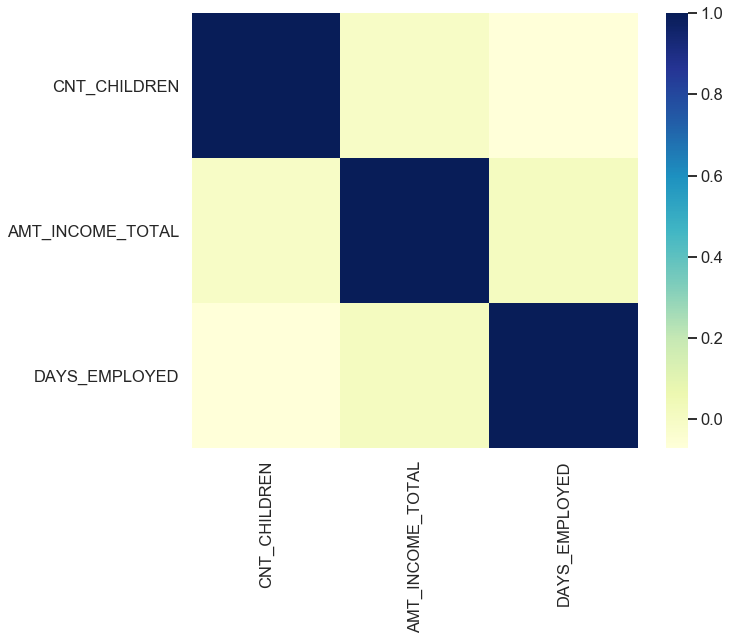

In [71]:
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool),cmap="YlGnBu", ax=ax)

___Infernces:-___


- Among the columns no of children (CNT_CHILDREN) , no of days employes(DAYS_EMPLOYED) and total annual income (AMT_INCOME_TOTAL) there seems to be less co-relation.

- Heatmap for dataframe with target variable 1 ( People who have defaulted ) 

In [72]:
cols=['EXT_SOURCE_3', 'EXT_SOURCE_2',
       'AMT_GOODS_PRICE', 'AMT_ANNUITY',
        'AMT_CREDIT', 'AMT_INCOME_TOTAL',
       'DAYS_REGISTRATION', 'REGION_POPULATION_RELATIVE','CNT_CHILDREN', 
       'HOUR_APPR_PROCESS_START','DAYS_ID_PUBLISH', 
        'DAYS_EMPLOYED', 'DAYS_BIRTH']


In [73]:
app_1=app_1[cols]
defaulters_correlation = app_1.corr()
round(defaulters_correlation, 3)

EXT_SOURCE_3  EXT_SOURCE_2  AMT_GOODS_PRICE  AMT_ANNUITY  AMT_CREDIT  AMT_INCOME_TOTAL  DAYS_REGISTRATION  REGION_POPULATION_RELATIVE  CNT_CHILDREN  HOUR_APPR_PROCESS_START  DAYS_ID_PUBLISH  DAYS_EMPLOYED  DAYS_BIRTH
EXT_SOURCE_3                       1.000         0.042            0.052        0.039       0.052            -0.018              0.049                      -0.015        -0.009                   -0.054            0.063          0.050       0.103
EXT_SOURCE_2                       0.042         1.000            0.137        0.120       0.126             0.006              0.078                       0.170        -0.010                    0.129            0.065          0.094       0.143
AMT_GOODS_PRICE                    0.052         0.137            1.000        0.749       0.982             0.036              0.032                       0.076        -0.008                    0.042            0.065          0.112       0.185
AMT_ANNUITY                        0.039         0.120            0.749        1.000       0.749             0.043             -0.014                       0.074         0.016                    0.023            0.044          0.049       0.090
AMT_CREDIT                         0.052         0.126            0.982        0.749       1.000             0.036              0.033                       0.069        -0.002                    0.029            0.062          0.106       0.190
AMT_INCOME_TOTAL                  -0.018         0.006            0.036        0.043       0.036             1.000              0.004                       0.008         0.002                    0.013            0.009          0.000       0.008
DAYS_REGISTRATION                  0.049         0.078            0.032       -0.014       0.033             0.004              1.000                       0.056        -0.126                    0.048            0.050          0.137       0.241
REGION_POPULATION_RELATIVE        -0.015         0.170            0.076        0.074       0.069             0.008              0.056                       1.000        -0.032                    0.144            0.012          0.016       0.050
CNT_CHILDREN                      -0.009        -0.010           -0.008        0.016      -0.002             0.002             -0.126                      -0.032         1.000                   -0.039            0.090         -0.033      -0.177
HOUR_APPR_PROCESS_START           -0.054         0.129            0.042        0.023       0.029             0.013              0.048                       0.144        -0.039                    1.000           -0.009         -0.000      -0.035
DAYS_ID_PUBLISH                    0.063         0.065            0.065        0.044       0.062             0.009              0.050                       0.012         0.090                   -0.009            1.000          0.097       0.136
DAYS_EMPLOYED                      0.050         0.094            0.112        0.049       0.106             0.000              0.137                       0.016        -0.033                   -0.000            0.097          1.000       0.307
DAYS_BIRTH                         0.103         0.143            0.185        0.090       0.190             0.008              0.241                       0.050        -0.177                   -0.035            0.136          0.307       1.000

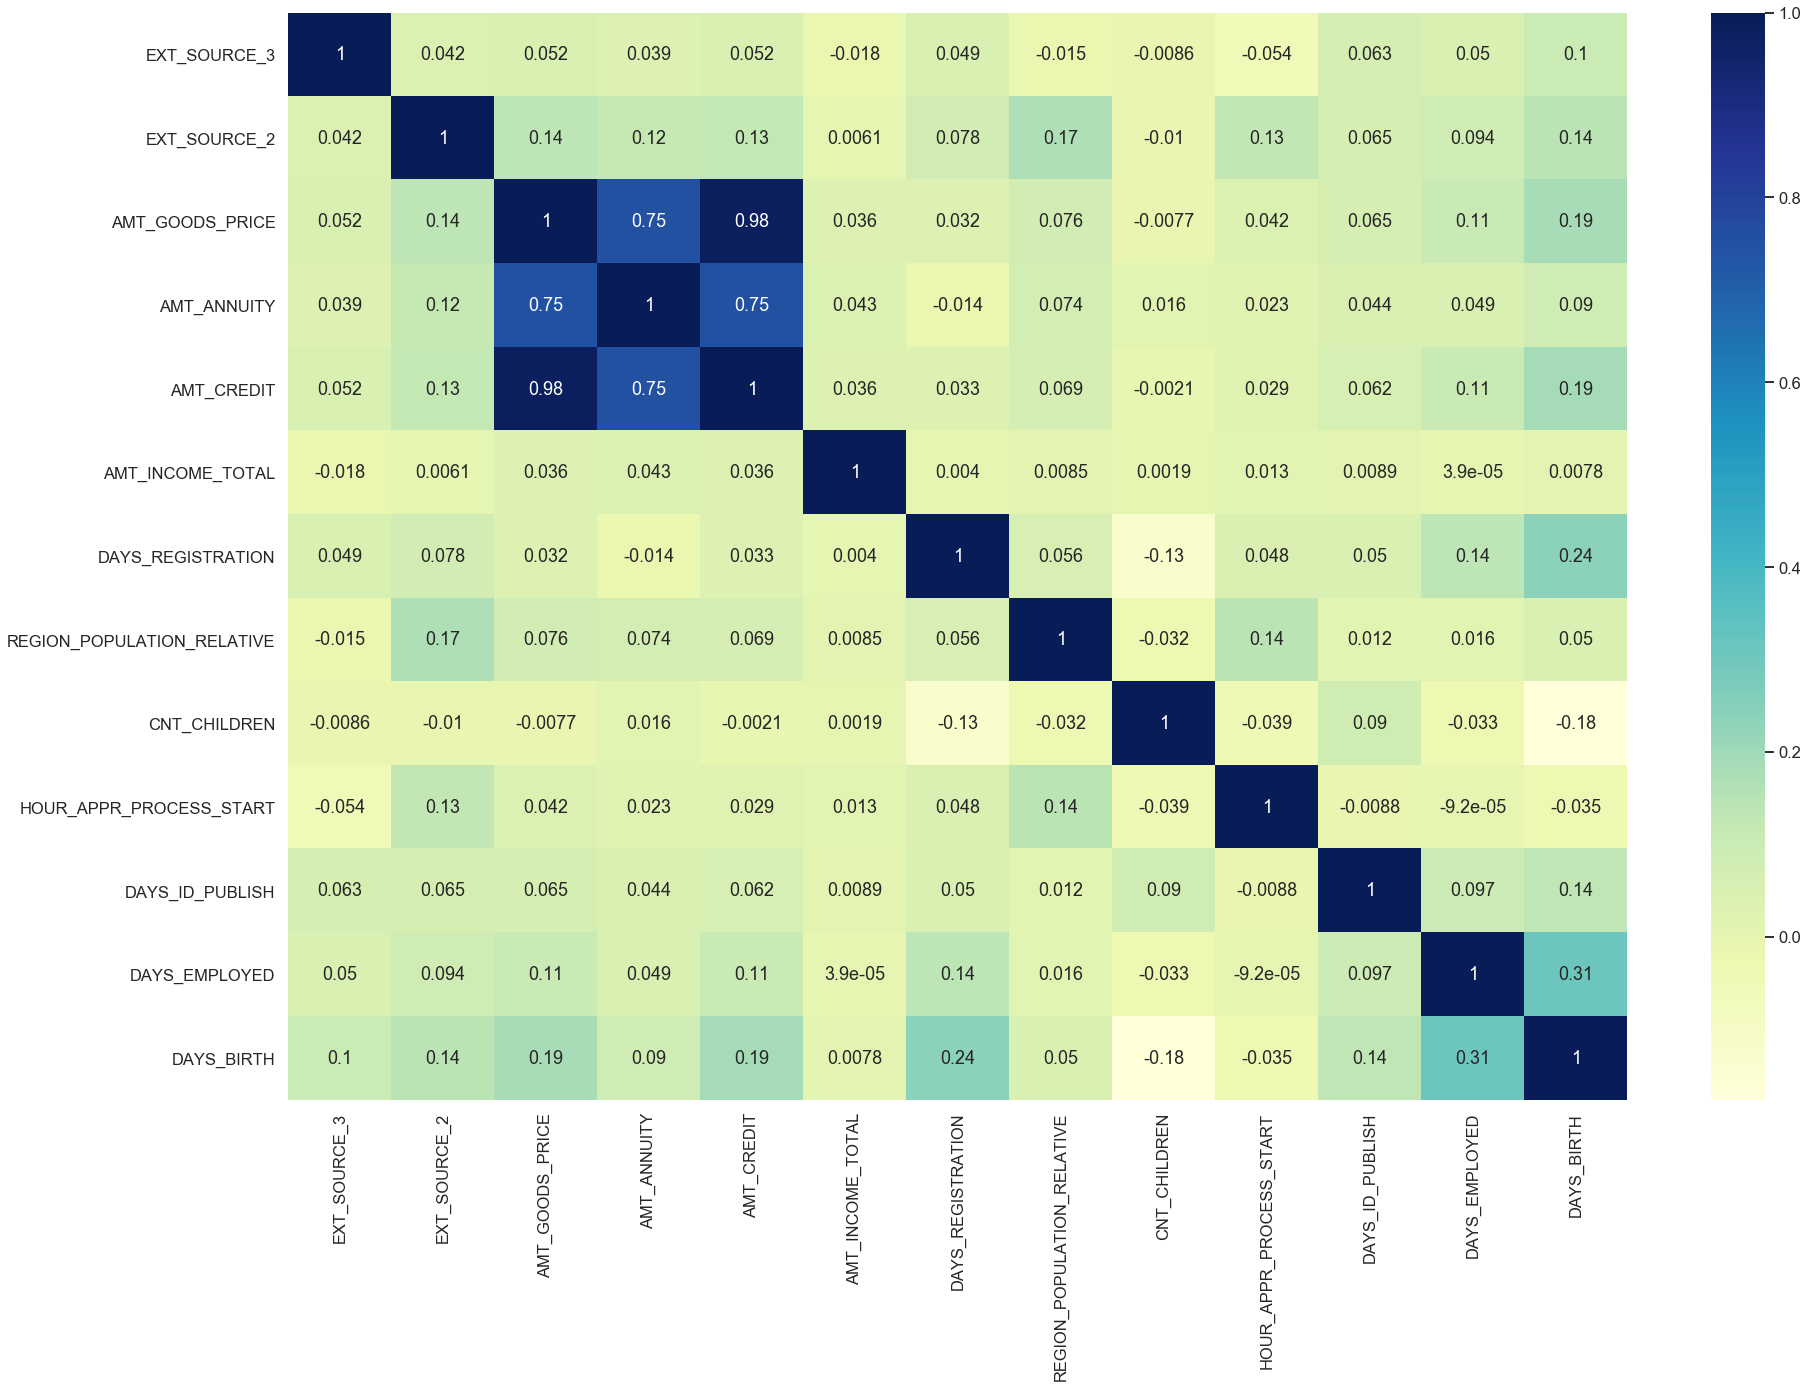

In [74]:
# figure size
plt.figure(figsize=(30,20))

# heatmap
sns.heatmap(defaulters_correlation, cmap="YlGnBu", annot=True)
plt.show()

___Inferences:-___ 


Highest co-relation:-


- AMT_CREDIT and AMT_GOODS_PRICE 

- AMT_CREDIT and AMT_ANNUITY 


Some Columns even show negative co-relation such as :- 

- EXT_SOURC_3 and REGION_POPULATION_RELATIVE 

- DAYS_REGISTRATION and CNT_CHILDREN 

- Heatmap for dataframe with target variable 0( People who have not defaulted )


In [75]:
app_0=app_0[cols]
nondefaulters_correlation = app_0.corr()
round(nondefaulters_correlation, 3)

EXT_SOURCE_3  EXT_SOURCE_2  AMT_GOODS_PRICE  AMT_ANNUITY  AMT_CREDIT  AMT_INCOME_TOTAL  DAYS_REGISTRATION  REGION_POPULATION_RELATIVE  CNT_CHILDREN  HOUR_APPR_PROCESS_START  DAYS_ID_PUBLISH  DAYS_EMPLOYED  DAYS_BIRTH
EXT_SOURCE_3                       1.000         0.084            0.051        0.041       0.049            -0.047              0.080                      -0.011        -0.015                   -0.033            0.084          0.107       0.151
EXT_SOURCE_2                       0.084         1.000            0.142        0.127       0.136             0.138              0.072                       0.207        -0.026                    0.152            0.060          0.081       0.142
AMT_GOODS_PRICE                    0.051         0.142            1.000        0.767       0.986             0.333              0.012                       0.107        -0.022                    0.050            0.037          0.089       0.147
AMT_ANNUITY                        0.041         0.127            0.767        1.000       0.762             0.401             -0.010                       0.122        -0.008                    0.034            0.026          0.052       0.092
AMT_CREDIT                         0.049         0.136            0.986        0.762       1.000             0.326              0.015                       0.104        -0.019                    0.040            0.035          0.088       0.153
AMT_INCOME_TOTAL                  -0.047         0.138            0.333        0.401       0.326             1.000             -0.035                       0.169        -0.010                    0.056            0.026          0.030       0.046
DAYS_REGISTRATION                  0.080         0.072            0.012       -0.010       0.015            -0.035              1.000                       0.060        -0.163                    0.032            0.030          0.172       0.299
REGION_POPULATION_RELATIVE        -0.011         0.207            0.107        0.122       0.104             0.169              0.060                       1.000        -0.030                    0.175            0.004         -0.009       0.041
CNT_CHILDREN                      -0.015        -0.026           -0.022       -0.008      -0.019            -0.010             -0.163                      -0.030         1.000                   -0.033            0.118         -0.063      -0.242
HOUR_APPR_PROCESS_START           -0.033         0.152            0.050        0.034       0.040             0.056              0.032                       0.175        -0.033                    1.000           -0.005         -0.022      -0.049
DAYS_ID_PUBLISH                    0.084         0.060            0.037        0.026       0.035             0.026              0.030                       0.004         0.118                   -0.005            1.000          0.087       0.108
DAYS_EMPLOYED                      0.107         0.081            0.089        0.052       0.088             0.030              0.172                      -0.009        -0.063                   -0.022            0.087          1.000       0.353
DAYS_BIRTH                         0.151         0.142            0.147        0.092       0.153             0.046              0.299                       0.041        -0.242                   -0.049            0.108          0.353       1.000

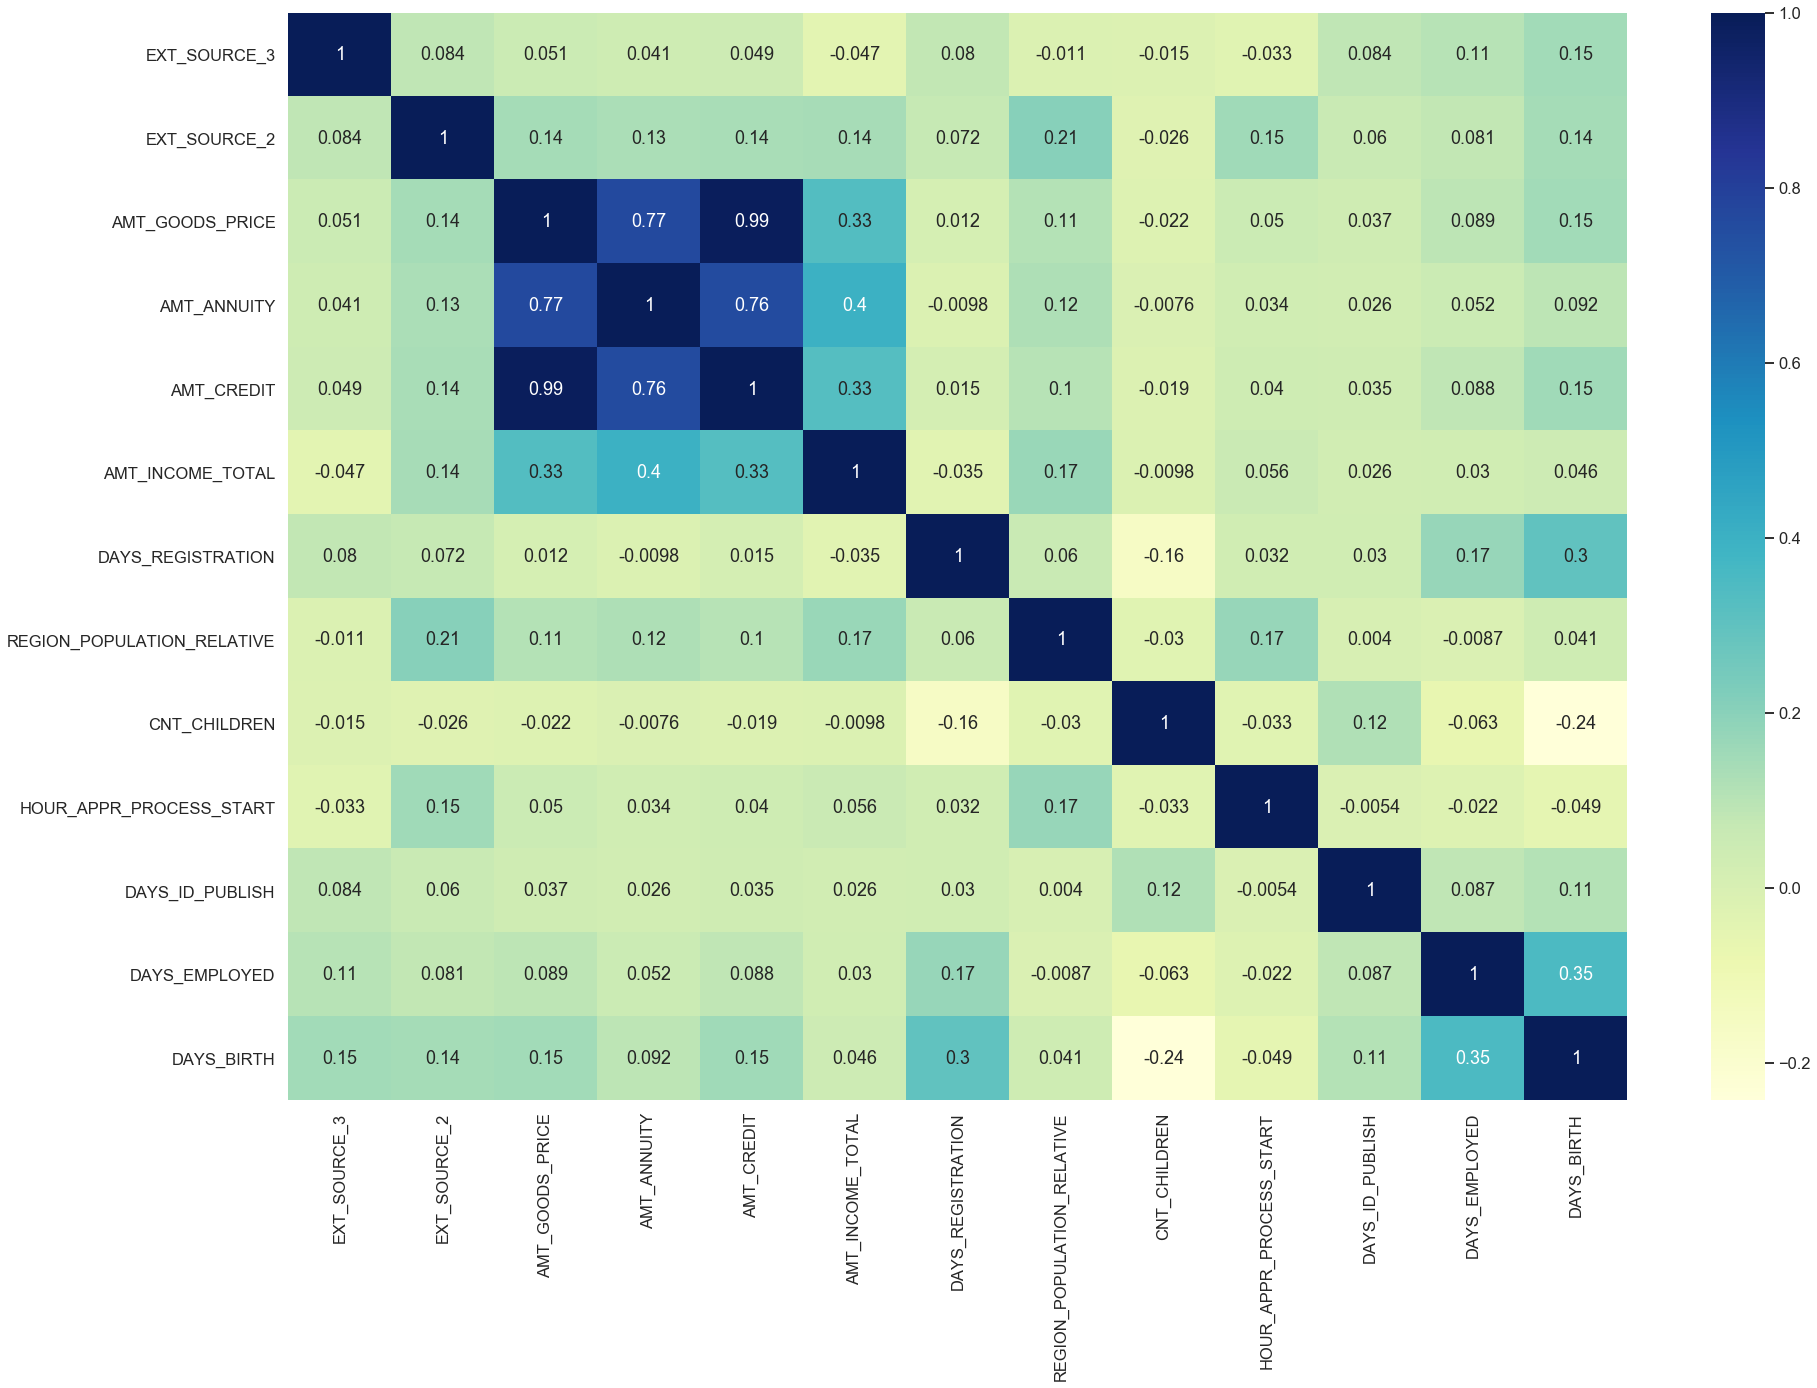

In [76]:
plt.figure(figsize=(30,20))

# heatmap
sns.heatmap(nondefaulters_correlation, cmap="YlGnBu", annot=True)
plt.show()

___Infernce:-___

- Here there seems to be no great co-relation between the columns because the co-relation is >.50 

### 4.3 Analysis on Merged dataframe ( app_prev )

- Analysis on purpose of cash loan and its status 

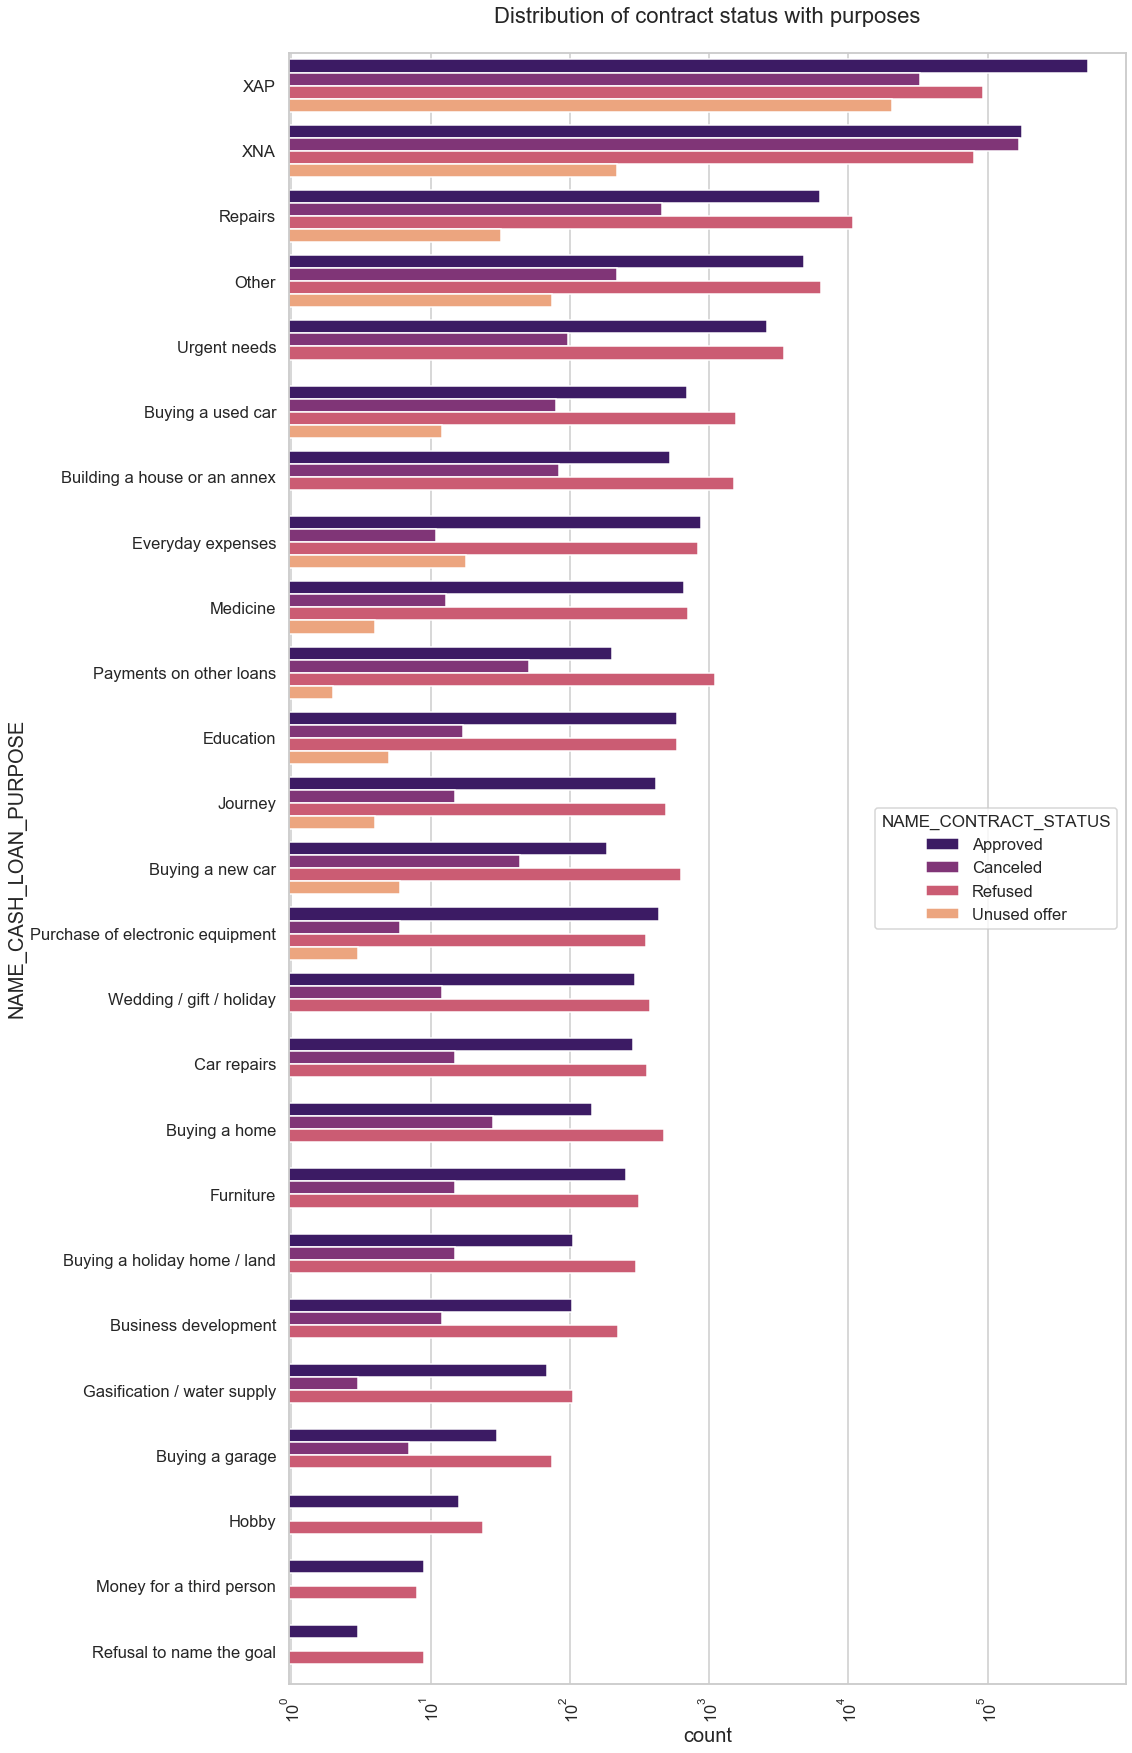

In [77]:
sns.set_style('whitegrid')
sns.set_context('talk')

plt.figure(figsize=(15,30))
plt.rcParams["axes.labelsize"] = 20
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.titlepad'] = 30
plt.xticks(rotation=90)
plt.xscale('log')
plt.title('Distribution of contract status with purposes')
ax = sns.countplot(data = app_prev, y= 'NAME_CASH_LOAN_PURPOSE', 
                   order=app_prev['NAME_CASH_LOAN_PURPOSE'].value_counts().index,hue = 'NAME_CONTRACT_STATUS',palette='magma') 

___Inferences :-___ 


- Most rejection of loans came from purpose 'repairs'.

- For education purposes we have equal number of approvals and rejection

- Paying other loans and buying a new car is having significant higher rejection than approvals.

- Analysis on Cash loan purpose with target variables 0 ( people who have not defaulted ) and 1 (People who have defaulted)

In [ ]:
sns.set_style('whitegrid')
sns.set_context('talk')

plt.figure(figsize=(15,30))
plt.rcParams["axes.labelsize"] = 20
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.titlepad'] = 30
plt.xticks(rotation=90)
plt.xscale('log')
plt.title('Distribution of purposes with target ')
ax = sns.countplot(data = app_prev, y= 'NAME_CASH_LOAN_PURPOSE', 
                   order=app_prev['NAME_CASH_LOAN_PURPOSE'].value_counts().index,hue = 'TARGET',palette='magma') 

___Inferences:-___


- Loan purposes with 'Repairs' are facing more difficulites in payment on time.

- There are few places where loan payment is significant higher than facing difficulties. They are 'Buying a garage', 'Business developemt', 'Buying land','Buying a new car' and 'Education' Hence we can focus on these purposes for which the client is having for minimal payment difficulties.

## 5. Conclusion 

**1. Most of the Loans have been given out is of the type Cash Loans but Revolving type of Loans seems to have comparitively fewer defaulters due to the fact that they are flexible in nature**

**2. Most of the loans are provided to the segments of people** 

- who own a house/apartment, 

- working class people  

- organization type business entity type 3 

**3.The segments of people who are defaulters(facing difficulties in repaying of loan amount on time ) belong to the category**

- income type working 

- loan purpose repair 

- family status not married/single 

**4.The segments of people who are non defaulters(facing no difficulties in repaying of loan amount on time ) belong to the category**

- loan purpose for Buying a garage,Business developemt,Buying land,Buying a new car and Education

- education type with people having academic degree

- income type state servant  